
<h5 style="text-align: center; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: bold; text-decoration: None; text-transform: none; letter-spacing: 1px; color:#0A800B; background-color: #ffffff;">Lab 01: Trực quan hóa dữ liệu với Python <br> <br> Nhóm 22
</h5>

<div style="color:#254E58;margin:0;font-size:48px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;overflow:hidden;font-weight:600;"> Employee Attrition and Factorsy</div>

<br>  
<div style="background-color:#254E58;margin:0;font-size:45px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;overflow:hidden;font-weight:600;"> 
<p style="text-align: center;">
<img src="https://raw.githubusercontent.com/ntclai/PictureForMyProject/main/lab3.jpeg" style='width: 700px; height: 450px;'>
</p>
</div>

# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Các thư viện sử dụng</b></div>

In [84]:
#cài đặt thêm một số thư viện cần thiết
"""
!pip install matplotlib
!pip install seaborn
!pip install plotly
!pip install wordcloud
!pip install altair
!pip install missingno
!pip install imbalanced-learn
!pip install sklearn
"""

'\n!pip install matplotlib\n!pip install seaborn\n!pip install plotly\n!pip install wordcloud\n!pip install altair\n!pip install missingno\n!pip install imbalanced-learn\n!pip install sklearn\n'

In [2]:
import pandas as pd
import numpy as np

#Thư viện cho trực quan hóa
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud
from plotly.offline import iplot
from plotly.subplots import make_subplots
import missingno as msno
from pandas.plotting import parallel_coordinates
import altair as alt

#Thư viện cho xây dựng mô hình học máy
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

<a id="top"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Mục lục</b></div>

<div class="list-group" id="list-tab" role="tablist">
    
   * [A. Thu thập dữ liệu](#1)
        - [I. Giới thiệu chủ đề và thông tin tập dữ liệu](#1.1)
            - [1. Chủ đề](#1.1.1)
            - [2. Ngữ cảnh tìm kiếm dữ liệu](#1.1.2)
            - [3. Thông tin bộ dữ liệu](#1.1.3)
        - [II. Cấu trúc bộ dữ liệu ](#1.2)
   * [B. Khám phá dữ liệu](#2)
        - [I. Mục tiêu](#2.1)
        - [II. Nội dung](#2.2)
            - [1. Đọc dữ liệu và tính số dòng và cột](#2.2.1)
            - [2. Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?](#2.2.2)
            - [3. Dữ liệu có các dòng bị lặp không?](#2.2.3)
            - [4. Tỉ lệ giá trị thiếu và thống kê mô tả của từng cột](#2.2.4)
            - [5. Kiểu dữ liệu của mỗi cột](#2.2.5)
            - [6. Xem xét tập giá trị của các thuộc tính phân loại](#2.2.6)
            - [7. Xem xét sự phân bố giá trị của các cột dữ liệu dạng số](#2.2.7)
            - [8. Xem xét sự phân bố giá trị của các cột dữ liệu không phải dạng số](#2.2.8)

   * [C. Khám phá mối quan hệ trong dữ liệu](#3)
        - [Biểu đồ 1](#3.1)
        - [Biểu đồ 2](#3.2)
        - [Biểu đồ 3](#3.3)
        - [Biểu đồ 4](#3.4)
        - [Biểu đồ 5](#3.5)
        - [Biểu đồ 6](#3.6)
        - [Biểu đồ 7](#3.7)
        - [Biểu đồ 8](#3.8)
        - [Biểu đồ 9](#3.9)
        - [Biểu đồ 10](#3.10)
        - [Biểu đồ 11](#3.11)
        - [Biểu đồ 12](#3.12)
        - [Biểu đồ 13](#3.13)
        - [Biểu đồ 14](#3.14)
        - [Biểu đồ 15](#3.15)
   * [D. Mô hình học máy](#4)
        - [I. Bài toán đặt ra ](#4.1)
        - [II. Tiền xử lý dữ liệu ](#4.2)
            - [1. Mã hóa các thuộc tính dạng danh mục về dạng số](#4.2.1)
            - [2. Loại những thuộc tính không có ý nghĩa cho bài toán](#4.2.2)
            - [3. Xử lý các giá trị thiếu](#4.2.3)
            - [4. Feature Scaling](#4.2.4)
        - [III. Xây dựng mô hình học máy ](#4.3)
            - [1. Logistic Regression cho Phân loại nhị phân](#4.3.1)
            - [2. Sử dụng Pipeline và Các độ đo được dùng để đánh giá mô hình](#4.3.2)
            - [3. Cài đặt](#4.3.3)

        - [V. Tổng kết](#4.4)

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>A. Thu thập dữ liệu</b></div>

<a id="1.1"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color:#254E58; background-color: #ffffff;"><b>I. Giới thiệu chủ đề </b> & <b> thông tin tập dữ liệu </b> </h2>

<a id="1.1.1"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>1. Chủ đề </b> </h2>

<div style="border-radius:10px;border:#0C6A86 solid;padding: 15px;background-color:#ebfae8;font-size:110%;text-align:left">
    
**Tên chủ đề:** Employee Attrition and Factors

**Tạm dịch:** Các yếu tố ảnh hưởng đến sự tiêu hao nhân viên



<a id="1.1.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>2. Ngữ cảnh tìm kiếm dữ liệu </b></h2>

<div style="border-radius:10px;border:#0C6A86 solid;padding: 15px;background-color:#ebfae8;font-size:110%;text-align:left">
    
Trong môi trường làm việc, Employee Attrition diễn tả việc tiêu hao lực lượng lao động không được dự báo trước. Nguyên nhân của của sự sụt giảm này đều là những lý do không thể tránh được như nghỉ hưu, từ chức, nhân viên mất sức lao động hay đột ngột qua đời. Những công ty có tỷ lệ tiêu hao lực lượng lao động cao thường phải đối mặt với nguy cơ lạm dụng nguồn lực nội bộ.

Nhận thấy, có rất nhiều nguyên nhân khác nhau khiến cho tỷ lệ tiêu hao lực lượng lao động cao ở các doanh nghiệp. Ví dụ như:

- Điều kiện làm việc không đảm bảo.
- Mức lương quá thấp.
- Công việc không phù hợp với sở thích.
- Không có tương lai phát triển sự nghiệp.
- Không thể cân bằng giữa công việc và cuộc sống.
- Thiếu sự nhìn nhận và đánh giá đúng mực đối với nhân viên từ phía những người quản lý.

Tỷ lệ tiêu hao lực lượng lao động là một chỉ số quan trọng trong quản trị nguồn nhân lực, có thể cho thấy các vấn đề còn tồn đọng cần phải được giải quyết. Attrition rate thấp cho thấy công ty đang đi đúng hướng. Ngược lại, attrition rate cao là điều không công ty nào mong muốn.

Do đó, nhóm chọn chủ đề và bộ dữ liệu này nhằm mục đích:

- Khám phá ra các yếu tố ảnh hưởng đến sự tiêu hao nhân viên từ đó đưa ra các biện pháp nhằm làm giảm tỷ lệ này.
- Xây dựng mô hình học máy dựa trên các yếu tố của nhân viên để dự đoán xem liệu nhân viên đó có khả năng tiêu hao hay không?

<a id="1.1.3"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>3. Thông tin bộ dữ liệu </b> </h2>

<div style="border-radius:10px;border:#0C6A86 solid;padding: 15px;background-color:#ebfae8;font-size:110%;text-align:left">
    
**Nguồn gốc:**

Bộ dữ liệu được tìm thấy trên Kaggle: https://www.kaggle.com/datasets/thedevastator/employee-attrition-and-factors

**Người đăng tải:** The Devastator

**Phương pháp thu thập:**

Đây là một tập dữ liệu hư cấu được tạo bởi các nhà khoa học dữ liệu IBM. Bộ dữ liệu này nhằm phục vụ cho mục đích nghiên cứu và khám phá ra các yếu tố dẫn đến sự tiêu hao của nhân viên hoặc xây dựng các mô hình học máy để dự đoán sự tiêu hao nhân viên.

**Giấy phép:** 

- C0 1.0 Universal (CC0 1.0) - Public Domain Dedication
   
- No Copyright - Bạn có thể sao chép, sửa đổi, phân phối và thực hiện công việc, ngay cả cho mục đích thương mại, tất cả mà không cần xin phép.

<center> <a href="#top" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color:#254E58; background-color: #ffffff;"> <b>II.  Cấu trúc bộ dữ liệu </b></h2>

Bộ dữ liệu này cung cấp một phân tích toàn diện và đa dạng về nhân viên của một tổ chức, tập trung vào các lĩnh vực như sự tiêu hao của nhân viên, các yếu tố cá nhân và liên quan đến công việc cũng như tài chính. Bao gồm nhiều 35 thuộc tính và ý nghĩa các thuộc tính như sau:

|STT  | Tên thuộc tính |  Ý nghĩa |
|:---| :---         |:---      |
| 1  | Age  | Tuổi của nhân viên |
| 2  | Gender  | Giới tính của nhân viên |
| 3  | BusinessTravel  | Tần suất đi công tác của nhân viên |
| 4  | DailyRate  | Tỷ lệ lương hàng ngày cho nhân viên |
| 5  | Department  | Phòng ban làm việc của nhân viên |
| 6  | DistanceFromHome  | Khoảng cách từ nhà theo dặm đến nơi làm việc |
| 7  | Education  | Mức độ giáo dục đạt được bởi nhân viên |
| 8  | EducationField  | Lĩnh vực học tập của nhân viên |
| 9  | EmployeeCount  | Tổng số nhân viên trong tổ chức |
| 10  | EmployeeNumber  | Một định danh duy nhất cho mỗi hồ sơ nhân viên |
| 11  | EnvironmentSatisfaction  | Sự hài lòng của nhân viên với môi trường làm việc của họ |
| 12  | HourlyRate  | Tỷ lệ lương hàng giờ cho nhân viên |
| 13  | JobInvolvement | Mức độ tham gia cần thiết cho công việc của nhân viên |
| 14  | JobLevel  | Mức độ công việc của nhân viên |
| 15  | JobRole | Vai trò của nhân viên trong tổ chức |
| 16  | JobSatisfaction  | Sự hài lòng của nhân viên với công việc của họ |
| 17  | MaritalStatus  | Tình trạng hôn nhân của nhân viên |
| 18  | MonthlyIncome  | Thu nhập hàng tháng của nhân viên |
| 19  | MonthlyRate  | Tỷ lệ lương hàng tháng cho nhân viên |
| 20  | NumCompaniesWorked  | Số lượng công ty mà nhân viên đã làm việc cho |
| 21  | Over18  | Nhân viên có trên 18 tuổi hay không |
| 22  | OverTime  | Nhân viên có tăng ca làm việc hay không |
| 23  | PercentSalaryHike  | Tỷ lệ tăng lương cho nhân viên |
| 24  | PerformanceRating  | The performance rating of the employee |
| 25  | RelationshipSatisfaction  | Sự hài lòng của nhân viên với các mối quan hệ của họ |
| 26  | StandardHours  | Giờ làm việc tiêu chuẩn cho nhân viên |
| 27  | StockOptionLevel  | Mức tùy chọn cổ phiếu của nhân viên |
| 28  | TotalWorkingYears  | Tổng số năm mà nhân viên đã làm việc |
| 29  | TrainingTimesLastYear  | Số lần nhân viên được thực hiện để đào tạo trong năm ngoái |
| 30  | WorkLifeBalance  | Nhận thức của nhân viên về cân bằng cuộc sống công việc của họ |
| 31  | YearsAtCompany  | Số năm nhân viên đã ở cùng với công ty |
| 32  | YearsInCurrentRole  | Số năm mà nhân viên đã ở trong vai trò hiện tại của họ |
| 33  | YearsSinceLastPromotion  | Số năm kể từ khi thăng chức cuối cùng của nhân viên |
| 34  | YearsWithCurrManager  | Số năm mà nhân viên đã làm với người quản lý hiện tại của họ |
| 35  | Attrition  | Nhân viên có rời khỏi tổ chức hay không  |






<center> <a href="#top" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="2"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>B. Khám phá dữ liệu</b></div>

<a id="2.1"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color:#254E58; background-color: #ffffff;"><b>I. Mục tiêu </b> </h2>

<div style="border-radius:10px;border:#0C6A86 solid;padding: 15px;background-color:#ebfae8;font-size:110%;text-align:left">
💬Ở phần này chúng ta sẽ thực hiện khám phá dữ liệu đã thu thập bằng cách sử dụng thống kê mô tả để hiểu dữ liệu tốt hơn, tức là để xác định các vấn đề về dữ liệu (dữ liệu bị thiếu giá trị, giá trị không hợp lệ, cột có kiểu dữ liệu không phù hợp để xử lý thêm,...). Thông qua việc khám phá dữ liệu, có thể ta sẽ phát hiện ra những điểm bất thường, không hợp lý của dữ liệu, từ đó thực hiện tiền xử lý để dữ liệu trở nên rõ ràng và dễ hiểu hơn, phục vụ tốt cho các mục đích khác.

<center> <a href="#top" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="2.2"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color:#254E58; background-color: #ffffff;"><b>II. Nội dung </b> </h2>

<a id="2.2.1"></a>
<h2 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>1.  Đọc dữ liệu và tính số dòng và cột </b></h2>

👉 Tiếp đến đọc file `"HR_Analytics.csv"` vào dataframe `df` và in ra 5 dòng đầu tiên của dataframe.

In [3]:
df = pd.read_csv("./datasets/HR_Analytics.csv")
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

👉 Tính số dòng và số cột và lưu vào 2 biến `num_rows` và `num_cols`.

In [4]:
num_rows, num_cols = df.shape
print(f'Number of rows: {num_rows}\nNumber of columns: {num_cols}')

Number of rows: 1470
Number of columns: 35


<a id="2.2.2"></a>
<h2 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>2. Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không? </b></h2>

**💬 Nhận xét:**
* Tập dữ liệu cung cấp một phân tích toàn diện và đa dạng về nhân viên ở một tổ chức.
* Mỗi dòng là thông tin của một nhân viên tập trung vào các khía cạnh như chi tiêu, các yếu tố cá nhân, công việc và tài chính.
<br>

**=> Vì thế sẽ không xuất hiện dòng nào có ý nghĩa khác.**

<a id="2.2.3"></a>
<h2 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>3. Dữ liệu có các dòng bị lặp không? </b></h2>

👉 Ta kiểm tra xem có dòng nào bị lặp không bằng cách sử dụng các phương thức `duplicated()` và `any()` trên dataframe `df` và lưu kết quả vào biến `have_duplicated_rows`. Biến này sẽ có giá trị True nếu dữ liệu có các dòng bị lặp và có giá trị False nếu ngược.

In [5]:
have_duplicate_rows = df.duplicated().any()
have_duplicate_rows

False

**💬 Nhận xét:** Ta thấy rằng dữ liệu không có dòng nào bị trùng lặp.

<a id="2.2.4"></a>
<h2 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>4. Tỉ lệ giá trị thiếu và thống kê mô tả của từng cột </b></h2>

👉 Để tính tỷ lệ giá trị thiếu, sử dụng phương thức `isna()` và `mean()` và lưu vào biến `missing_rate`

👉 Để thống kê mô tả mỗi cột, phương thức `describe()`.

Trong đó:
* `count`: số lượng giá trị không bị thiếu trong cột.
* `mean` : giá trị trung bình của các giá trị trong cột.
* `std` : độ lệch chuẩn của các giá trị trong cột.
* `min` : giá trị nhỏ nhất trong cột.
* `25%`, `50%`, `75%` : các **`phân vị`** tương ứng với các mức phân chia dữ liệu là `25%`, `50%` và `75%`.
* `max` : giá trị lớn nhất trong cột.

👉 Thống kê các cột `numerical`

In [6]:
describe = df.describe()
missing_rates = df[describe.columns].isna().mean()
missing_rates.name = 'missing_rate'
describe = pd.concat([describe, missing_rates.to_frame().T])
describe

Age    DailyRate  DistanceFromHome    Education  \
count         1470.000000  1470.000000       1470.000000  1470.000000   
mean            36.923810   802.485714          9.192517     2.912925   
std              9.135373   403.509100          8.106864     1.024165   
min             18.000000   102.000000          1.000000     1.000000   
25%             30.000000   465.000000          2.000000     2.000000   
50%             36.000000   802.000000          7.000000     3.000000   
75%             43.000000  1157.000000         14.000000     4.000000   
max             60.000000  1499.000000         29.000000     5.000000   
missing_rate     0.000000     0.000000          0.000000     0.000000   

              EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  \
count                1470.0     1470.000000              1470.000000   
mean                    1.0     1024.865306                 2.721769   
std                     0.0      602.024335                 1.093082   
min                     1.0        1.000000                 1.000000   
25%                     1.0      491.250000                 2.000000   
50%                     1.0     1020.500000                 3.000000   
75%                     1.0     1555.750000                 4.000000   
max                     1.0     2068.000000                 4.000000   
missing_rate            0.0        0.000000                 0.000000   

               HourlyRate  JobInvolvement     JobLevel  ...  \
count         1470.000000     1470.000000  1470.000000  ...   
mean            65.891156        2.729932     2.063946  ...   
std             20.329428        0.711561     1.106940  ...   
min             30.000000        1.000000     1.000000  ...   
25%             48.000000        2.000000     1.000000  ...   
50%             66.000000        3.000000     2.000000  ...   
75%             83.750000        3.000000     3.000000  ...   
max            100.000000        4.000000     5.000000  ...   
missing_rate     0.000000        0.000000     0.000000  ...   

              RelationshipSatisfaction  StandardHours  StockOptionLevel  \
count                      1470.000000         1470.0       1470.000000   
mean                          2.712245           80.0          0.793878   
std                           1.081209            0.0          0.852077   
min                           1.000000           80.0          0.000000   
25%                           2.000000           80.0          0.000000   
50%                           3.000000           80.0          1.000000   
75%                           4.000000           80.0          1.000000   
max                           4.000000           80.0          3.000000   
missing_rate                  0.000000            0.0          0.000000   

              TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count               1470.000000            1470.000000      1470.000000   
mean                  11.279592               2.799320         2.761224   
std                    7.780782               1.289271         0.706476   
min                    0.000000               0.000000         1.000000   
25%                    6.000000               2.000000         2.000000   
50%                   10.000000               3.000000         3.000000   
75%                   15.000000               3.000000         3.000000   
max                   40.000000               6.000000         4.000000   
missing_rate           0.000000               0.000000         0.000000   

              YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count            1470.000000         1470.000000              1470.000000   
mean                7.008163            4.229252                 2.187755   
std                 6.126525            3.623137                 3.222430   
min                 0.000000            0.000000                 0.000000   
25%                 3.000000            2.000000    

👉 Thống kê các cột `category`

In [7]:
describe = df.describe(include=['O'])
missing_rates = df[describe.columns].isna().mean()
missing_rates.name = 'missing_rate'
describe = pd.concat([describe, missing_rates.to_frame().T])
describe

Attrition BusinessTravel              Department EducationField  \
count             1470           1470                    1470           1470   
unique               2              3                       3              6   
top                 No  Travel_Rarely  Research & Development  Life Sciences   
freq              1233           1043                     961            606   
missing_rate       0.0            0.0                     0.0            0.0   

             Gender          JobRole MaritalStatus Over18 OverTime  
count          1470             1470          1470   1470     1470  
unique            2                9             3      1        2  
top            Male  Sales Executive       Married      Y       No  
freq            882              326           673   1470     1054  
missing_rate    0.0              0.0           0.0    0.0      0.0

👉 Biểu đồ `histogram` cho các cột `numerical`

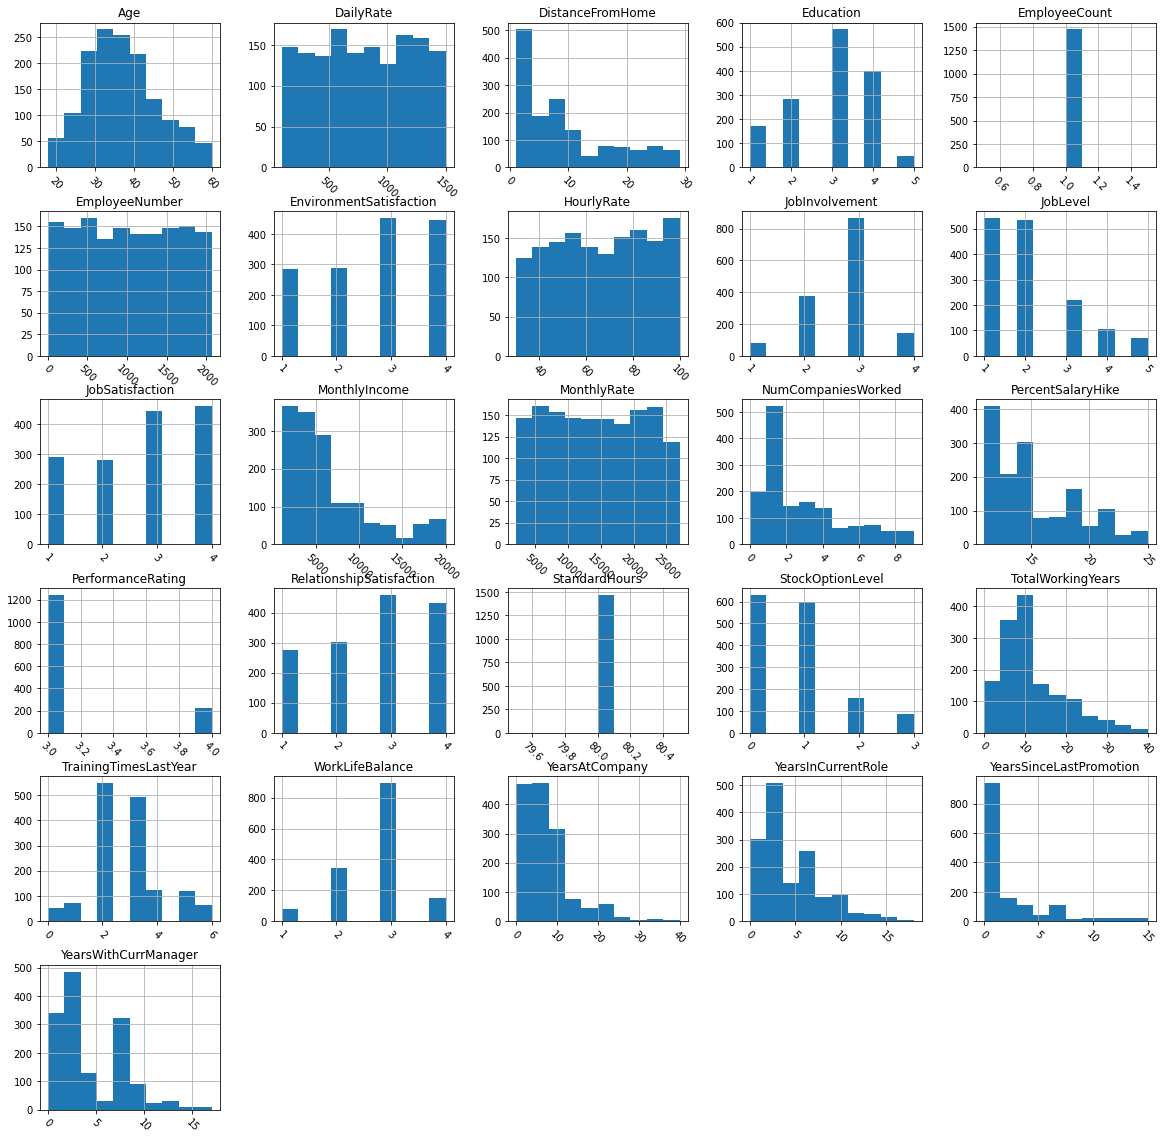

In [8]:
df.hist(figsize=(20,20), xrot=-45)
plt.show()

##### **💬 Nhận xét**: Các cột sau đây có thể lược bỏ bởi vì giá trị của chúng không ảnh hưởng đến kết quả phân tích
1. `Over18`: Các giá trị đều là `Y`
2. `EmployeeCount`: các giá trị đều là `1.0`
3. `StandardHours`: các giá trị đều là `80.0`
4. `EmployeeNumber`: là `id` của nhân viên có ý nghĩa tương tự như `index` của mỗi dòng

<a id="2.2.5"></a>
<h2 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>5. Kiểu dữ liệu của mỗi cột</b></h2>

👉 Ta sử dụng phương thức `dtypes` trên dataframe `df` để xem kiểu dữ liệu của mỗi cột. Kết quả được lưu vào series `col_dtypes`; series này có index là tên các cột và giá trị là kiểu dữ liệu của các cột tương ứng.

In [9]:
col_dtype = df.dtypes
col_dtype

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

👉 Ta sử dụng phương thức `select_dtypes` để liệt kê các cột kiểu `numerical` và `category`.

In [10]:
cat_coulmns  = df.select_dtypes(['object']).columns
num_coulmns  = df.select_dtypes(['number']).columns
print(cat_coulmns)
print(num_coulmns)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


<a id="2.2.6"></a>
<h2 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>6. Xem xét tập giá trị của các thuộc tính phân loại </b></h2>

👉 Tên các thuộc tính dạng số và không phải dạng số lần lượt được lưu vào `num_cols` và `cat_cols`.

In [11]:
num_cols = list(set(df._get_numeric_data()))
cat_cols = list(set(df.columns) - set(df._get_numeric_data()))

👉 Xem xét mỗi thuộc tính phân loại có bao nhiêu giá trị phân biệt bằng phương thức `set()`.

In [12]:
for col in cat_cols:
    print('Unique values of ', col, set(df[col]))

Unique values of  EducationField {'Marketing', 'Human Resources', 'Other', 'Life Sciences', 'Technical Degree', 'Medical'}
Unique values of  Gender {'Female', 'Male'}
Unique values of  BusinessTravel {'Non-Travel', 'Travel_Rarely', 'Travel_Frequently'}
Unique values of  Over18 {'Y'}
Unique values of  Department {'Research & Development', 'Human Resources', 'Sales'}
Unique values of  MaritalStatus {'Single', 'Married', 'Divorced'}
Unique values of  OverTime {'Yes', 'No'}
Unique values of  Attrition {'Yes', 'No'}
Unique values of  JobRole {'Sales Representative', 'Sales Executive', 'Human Resources', 'Research Director', 'Laboratory Technician', 'Research Scientist', 'Healthcare Representative', 'Manager', 'Manufacturing Director'}


##### **💬 Nhận xét**: 

Tập giá trị của các thuộc tính phân loại đầy đủ, dễ hiểu nên ta không cần thực hiện các bước tiền xử lý đối với các thuộc tính này.

<a id="2.2.7"></a>
<h2 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>7. Xem xét sự phân bố giá trị của các cột dữ liệu dạng số</b></h2>

👉 Thực hiện thống kê trên các cột dữ liệu dạng số và xem xét các giá trị cụ thể như sau:

- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu (missing_ratio).
- Giá trị min (min).
- Giá trị lower quartile (phân vị 25) (lower_quartile).
- Giá trị median (phân vị 50) (median).
- Giá trị upper quartile (phân vị 75) (upper_quartile).
- Giá trị max (max).

👉 Tính tổng giá trị thiếu của từng cột bằng phương thức `isnull()` và `sum()`, rồi chia cho số dòng để được tỉ lệ giá trị thiếu `missing_ratio`.

In [13]:
missing_ratio = df[num_cols].isnull().sum()
missing_ratio = missing_ratio / num_rows
missing_ratio_df = pd.DataFrame({'missing_ratio': missing_ratio})
missing_ratio_df

missing_ratio
DistanceFromHome                    0.0
RelationshipSatisfaction            0.0
HourlyRate                          0.0
PercentSalaryHike                   0.0
Education                           0.0
TrainingTimesLastYear               0.0
DailyRate                           0.0
YearsSinceLastPromotion             0.0
WorkLifeBalance                     0.0
JobSatisfaction                     0.0
EmployeeNumber                      0.0
JobLevel                            0.0
MonthlyRate                         0.0
NumCompaniesWorked                  0.0
YearsInCurrentRole                  0.0
YearsWithCurrManager                0.0
TotalWorkingYears                   0.0
PerformanceRating                   0.0
MonthlyIncome                       0.0
Age                                 0.0
EmployeeCount                       0.0
StandardHours                       0.0
StockOptionLevel                    0.0
EnvironmentSatisfaction             0.0
JobInvolvement                      0.0
YearsAtCompany                      0.0

Trực quan sự phân bố các giá trị thiếu bằng thư viện `missingno`

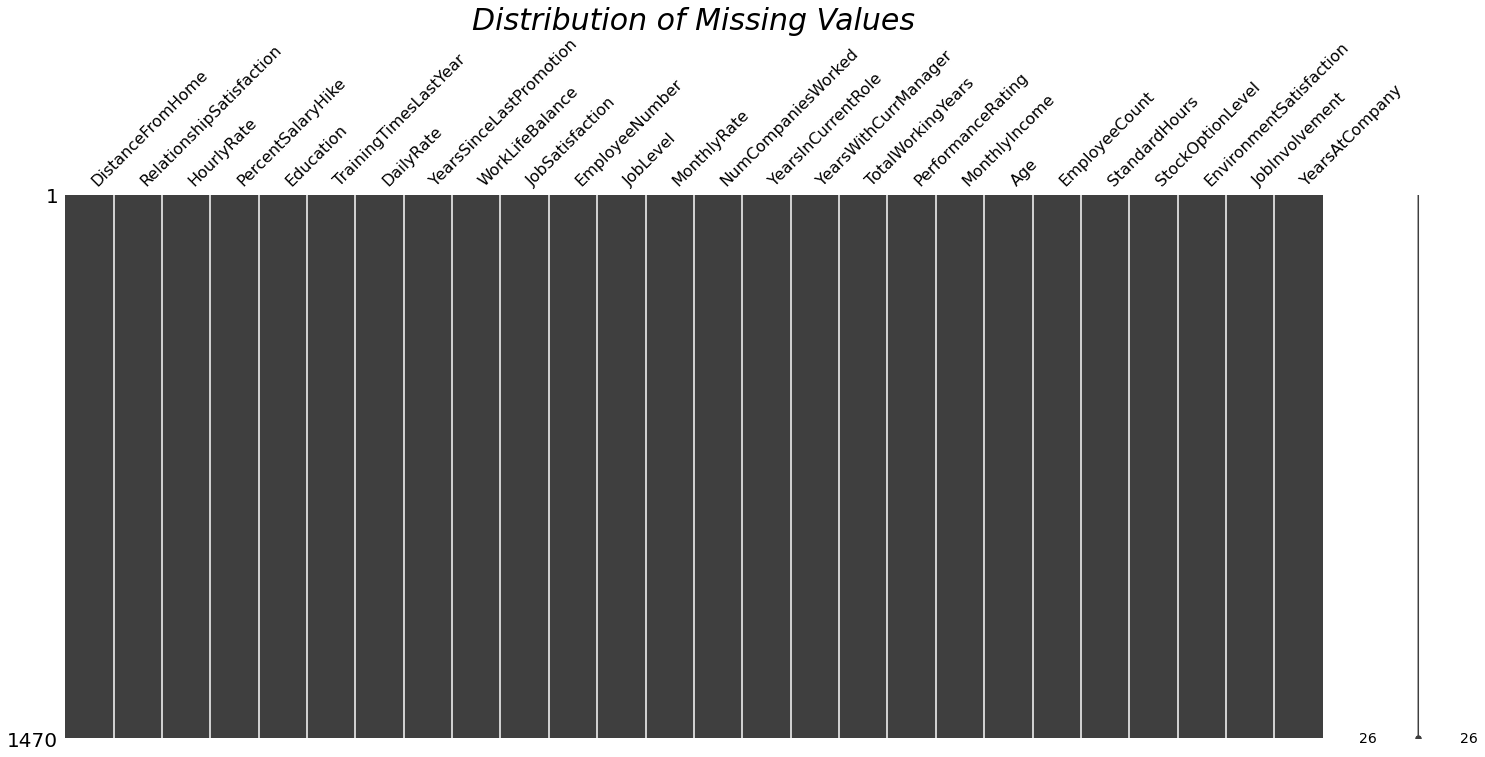

In [14]:
msno.matrix(df[num_cols])
plt.title('Distribution of Missing Values',fontsize=30, fontstyle= 'oblique');

👉 Tính các giá trị thống kê mô tả bằng phương thức `describe()`.

In [15]:
num_cols_info_df = df[num_cols].describe()
num_cols_info_df

DistanceFromHome  RelationshipSatisfaction   HourlyRate  \
count       1470.000000               1470.000000  1470.000000   
mean           9.192517                  2.712245    65.891156   
std            8.106864                  1.081209    20.329428   
min            1.000000                  1.000000    30.000000   
25%            2.000000                  2.000000    48.000000   
50%            7.000000                  3.000000    66.000000   
75%           14.000000                  4.000000    83.750000   
max           29.000000                  4.000000   100.000000   

       PercentSalaryHike    Education  TrainingTimesLastYear    DailyRate  \
count        1470.000000  1470.000000            1470.000000  1470.000000   
mean           15.209524     2.912925               2.799320   802.485714   
std             3.659938     1.024165               1.289271   403.509100   
min            11.000000     1.000000               0.000000   102.000000   
25%            12.000000     2.000000               2.000000   465.000000   
50%            14.000000     3.000000               3.000000   802.000000   
75%            18.000000     4.000000               3.000000  1157.000000   
max            25.000000     5.000000               6.000000  1499.000000   

       YearsSinceLastPromotion  WorkLifeBalance  JobSatisfaction  ...  \
count              1470.000000      1470.000000      1470.000000  ...   
mean                  2.187755         2.761224         2.728571  ...   
std                   3.222430         0.706476         1.102846  ...   
min                   0.000000         1.000000         1.000000  ...   
25%                   0.000000         2.000000         2.000000  ...   
50%                   1.000000         3.000000         3.000000  ...   
75%                   3.000000         3.000000         4.000000  ...   
max                  15.000000         4.000000         4.000000  ...   

       TotalWorkingYears  PerformanceRating  MonthlyIncome          Age  \
count        1470.000000        1470.000000    1470.000000  1470.000000   
mean           11.279592           3.153741    6502.931293    36.923810   
std             7.780782           0.360824    4707.956783     9.135373   
min             0.000000           3.000000    1009.000000    18.000000   
25%             6.000000           3.000000    2911.000000    30.000000   
50%            10.000000           3.000000    4919.000000    36.000000   
75%            15.000000           3.000000    8379.000000    43.000000   
max            40.000000           4.000000   19999.000000    60.000000   

       EmployeeCount  StandardHours  StockOptionLevel  \
count         1470.0         1470.0       1470.000000   
mean             1.0           80.0          0.793878   
std              0.0            0.0          0.852077   
min              1.0           80.0          0.000000   
25%              1.0           80.0          0.000000   
50%              1.0           80.0          1.000000   
75%              1.0           80.0          1.000000   
max              1.0           80.0          3.000000   

       EnvironmentSatisfaction  JobInvolvement  YearsAtCompany  
count              1470.000000     1470.000000     1470.000000  
mean                  2.721769        2.729932        7.008163  
std                   1.093082        0.711561        6.126525  
min                   1.000000        1.000000        0.000000  
25%                   2.000000        2.000000        3.000000  
50%                   3.000000        3.000000        5.000000  
75%                   4.000000        3.000000        9.000000  
max                   4.000000        4.000000       40.000000  

[8 rows x 26 columns]

Gộp `missing_ratio_df` và `num_cols_info_df` để quan sát đầy đủ các giá trị thống kê cần thiết.

In [16]:
num_cols_info_df = pd.concat([missing_ratio_df.transpose(), num_cols_info_df], axis=0)
pd.set_option("display.max_columns", None)
display(num_cols_info_df)
pd.reset_option('display.max_columns')

DistanceFromHome  RelationshipSatisfaction   HourlyRate  \
missing_ratio          0.000000                  0.000000     0.000000   
count               1470.000000               1470.000000  1470.000000   
mean                   9.192517                  2.712245    65.891156   
std                    8.106864                  1.081209    20.329428   
min                    1.000000                  1.000000    30.000000   
25%                    2.000000                  2.000000    48.000000   
50%                    7.000000                  3.000000    66.000000   
75%                   14.000000                  4.000000    83.750000   
max                   29.000000                  4.000000   100.000000   

               PercentSalaryHike    Education  TrainingTimesLastYear  \
missing_ratio           0.000000     0.000000               0.000000   
count                1470.000000  1470.000000            1470.000000   
mean                   15.209524     2.912925               2.799320   
std                     3.659938     1.024165               1.289271   
min                    11.000000     1.000000               0.000000   
25%                    12.000000     2.000000               2.000000   
50%                    14.000000     3.000000               3.000000   
75%                    18.000000     4.000000               3.000000   
max                    25.000000     5.000000               6.000000   

                 DailyRate  YearsSinceLastPromotion  WorkLifeBalance  \
missing_ratio     0.000000                 0.000000         0.000000   
count          1470.000000              1470.000000      1470.000000   
mean            802.485714                 2.187755         2.761224   
std             403.509100                 3.222430         0.706476   
min             102.000000                 0.000000         1.000000   
25%             465.000000                 0.000000         2.000000   
50%             802.000000                 1.000000         3.000000   
75%            1157.000000                 3.000000         3.000000   
max            1499.000000                15.000000         4.000000   

               JobSatisfaction  EmployeeNumber     JobLevel   MonthlyRate  \
missing_ratio         0.000000        0.000000     0.000000      0.000000   
count              1470.000000     1470.000000  1470.000000   1470.000000   
mean                  2.728571     1024.865306     2.063946  14313.103401   
std                   1.102846      602.024335     1.106940   7117.786044   
min                   1.000000        1.000000     1.000000   2094.000000   
25%                   2.000000      491.250000     1.000000   8047.000000   
50%                   3.000000     1020.500000     2.000000  14235.500000   
75%                   4.000000     1555.750000     3.000000  20461.500000   
max                   4.000000     2068.000000     5.000000  26999.000000   

               NumCompaniesWorked  YearsInCurrentRole  YearsWithCurrManager  \
missing_ratio            0.000000            0.000000              0.000000   
count                 1470.000000         1470.000000           1470.000000   
mean                     2.693197            4.229252              4.123129   
std                      2.498009            3.623137              3.568136   
min                      0.000000            0.000000              0.000000   
25%                      1.000000            2.000000              2.000000   
50%                      2.000000            3.000000              3.000000   
75%                      4.000000            7.000000              7.000000   
max                      9.000000           18.000000             17.000000   

               TotalWorkingYears  PerformanceRating  MonthlyIncome  \
missing_ratio           0.000000           0.000000       0.000000   
count                1470.000000        1470.000000    1470.000000   
mean                   11.279592           3.153741    6502.

##### **💬 Nhận xét**: 

- Các cột dữ liệu dạng số hoàn toàn không có giá trị thiếu.
- Các giá trị min, lower quartile, median, upper quartile và max không cho thấy điều bất thường nên ta không cần thực hiện các bước tiền xử lý đối với các thuộc tính dạng số này.

<a id="2.2.8"></a>
<h2 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>8. Xem xét sự phân bố giá trị của các cột dữ liệu không phải dạng số</b></h2>

👉  Thực hiện thống kê trên các cột dữ liệu dạng số và xem xét các giá trị cụ thể như sau:

- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu (missing_ratio).
- Số lượng các giá trị khác nhau (không xét giá trị thiếu) (n_values).
- Tỉ lệ % (từ 0 đến 100) của mỗi giá trị được sắp xếp giảm dần (không xét giá trị thiếu, tỉ lệ là tỉ lệ so với số lượng các giá trị không thiếu). Các tỉ lệ này được lưu vào một dictionary cho mỗi thuộc tính, key là giá trị, value là tỉ lệ % (value_ratios).

👉 Tính tổng giá trị thiếu của từng cột bằng phương thức `isnull()` và `sum()`, rồi chia cho số dòng để được tỉ lệ giá trị thiếu `missing_ratio`.

In [17]:
missing_ratio = df[cat_cols].isnull().sum()
missing_ratio = missing_ratio / num_rows
missing_ratio_df = pd.DataFrame({'missing_ratio': missing_ratio})
missing_ratio_df

missing_ratio
EducationField            0.0
Gender                    0.0
BusinessTravel            0.0
Over18                    0.0
Department                0.0
MaritalStatus             0.0
OverTime                  0.0
Attrition                 0.0
JobRole                   0.0

Trực quan sự phân bố các giá trị thiếu bằng thư viện `missingno`

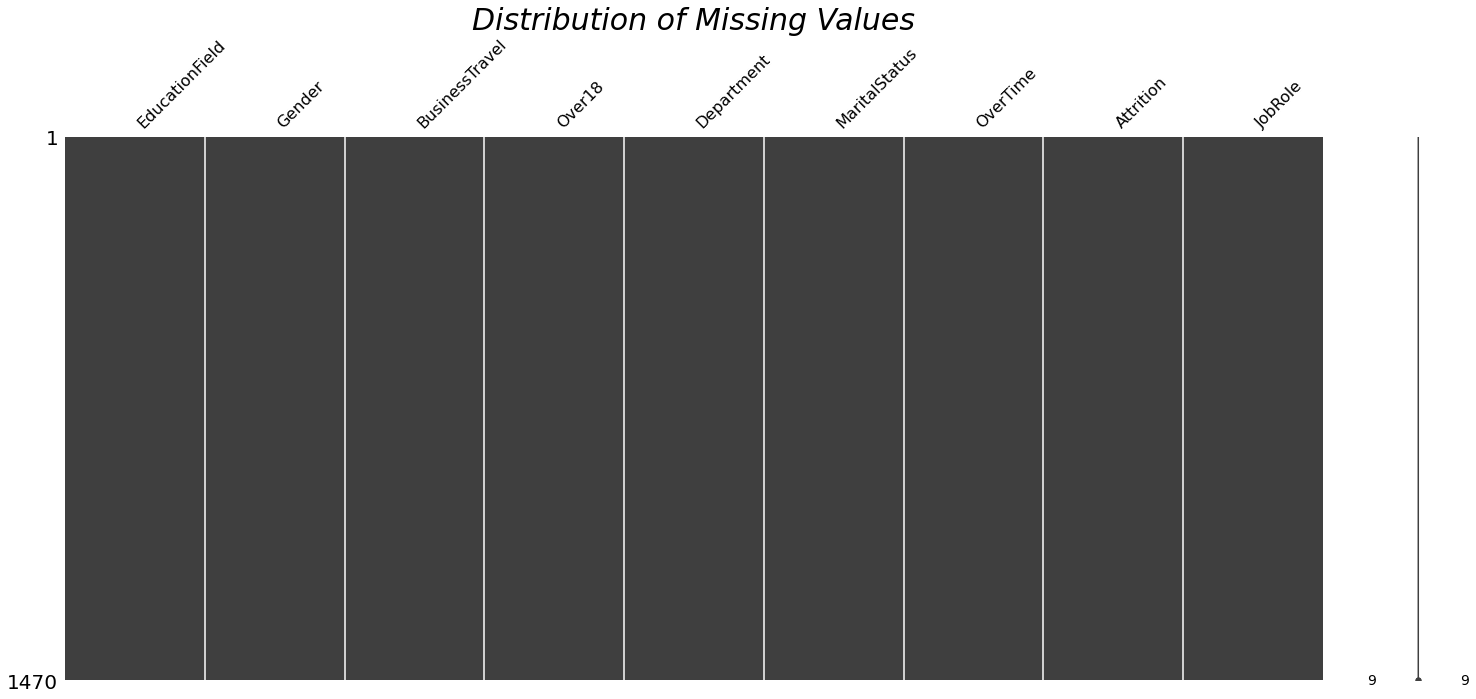

In [18]:
msno.matrix(df[cat_cols])
plt.title('Distribution of Missing Values',fontsize=30, fontstyle= 'oblique');

👉 Tính số lượng các giá trị khác nhau bằng phương thức nunique().

In [19]:
n_values_df = pd.DataFrame({'n_values': df[cat_cols].nunique()})
n_values_df

n_values
EducationField         6
Gender                 2
BusinessTravel         3
Over18                 1
Department             3
MaritalStatus          3
OverTime               2
Attrition              2
JobRole                9

👉 Tính tỉ lệ của mỗi giá trị bằng phương thức `value_counts()`.

In [20]:
value_ratios_dict = {}
for col in cat_cols:
    value_ratios_dict[col] = dict(df[col].value_counts(normalize=True) * 100)
value_ratios_df = pd.DataFrame({'value_ratios': value_ratios_dict})
value_ratios_df = value_ratios_df.transpose()[cat_cols]
value_ratios_df


EducationField  \
value_ratios  {'Life Sciences': 41.224489795918366, 'Medical...   

                                      Gender  \
value_ratios  {'Male': 60.0, 'Female': 40.0}   

                                                 BusinessTravel        Over18  \
value_ratios  {'Travel_Rarely': 70.95238095238095, 'Travel_F...  {'Y': 100.0}   

                                                     Department  \
value_ratios  {'Research & Development': 65.37414965986395, ...   

                                                  MaritalStatus  \
value_ratios  {'Married': 45.78231292517007, 'Single': 31.97...   

                                                       OverTime  \
value_ratios  {'No': 71.70068027210884, 'Yes': 28.2993197278...   

                                                      Attrition  \
value_ratios  {'No': 83.87755102040816, 'Yes': 16.1224489795...   

                                                        JobRole  
value_ratios  {'Sales Executive': 22.176870748299322, 'Resea...

👉 Gộp `missing_ratio_df`, `n_values_df` và `value_ratios_df` để quan sát đầy đủ các giá trị thống kê cần thiết.

In [21]:
cat_cols_info_df = pd.concat([missing_ratio_df.transpose(), n_values_df.transpose(), value_ratios_df], axis=0)
pd.set_option('display.max_colwidth', None)
display(cat_cols_info_df)
pd.reset_option('display.max_colwidth')

EducationField  \
missing_ratio                                                                                                                                                                                                              0.0   
n_values                                                                                                                                                                                                                     6   
value_ratios   {'Life Sciences': 41.224489795918366, 'Medical': 31.564625850340132, 'Marketing': 10.816326530612246, 'Technical Degree': 8.979591836734693, 'Other': 5.578231292517007, 'Human Resources': 1.8367346938775513}   

                                       Gender  \
missing_ratio                             0.0   
n_values                                    2   
value_ratios   {'Male': 60.0, 'Female': 40.0}   

                                                                                                                BusinessTravel  \
missing_ratio                                                                                                              0.0   
n_values                                                                                                                     3   
value_ratios   {'Travel_Rarely': 70.95238095238095, 'Travel_Frequently': 18.843537414965986, 'Non-Travel': 10.204081632653061}   

                     Over18  \
missing_ratio           0.0   
n_values                  1   
value_ratios   {'Y': 100.0}   

                                                                                                                    Department  \
missing_ratio                                                                                                              0.0   
n_values                                                                                                                     3   
value_ratios   {'Research & Development': 65.37414965986395, 'Sales': 30.34013605442177, 'Human Resources': 4.285714285714286}   

                                                                                             MaritalStatus  \
missing_ratio                                                                                          0.0   
n_values                                                                                                 3   
value_ratios   {'Married': 45.78231292517007, 'Single': 31.97278911564626, 'Divorced': 22.244897959183675}   

                                                          OverTime  \
missing_ratio                                                  0.0   
n_values                                                         2   
value_ratios   {'No': 71.70068027210884, 'Yes': 28.29931972789116}   

                                                          Attrition  \
missing_ratio                                                   0.0   
n_values                                                          2   
value_ratios   {'No': 83.87755102040816, 'Yes': 16.122448979591837}   

                                                                                                                                                                                                                                                                                                                                                                                       JobRole  
missing_ratio                                                                                                                                                                                                                                                                                                                                                                              0.0  
n_values                                                                                                                                                          

##### **💬 Nhận xét**: 

- Các cột dữ liệu không phải dạng số hoàn toàn không có giá trị thiếu.
- Thuộc tính 'Over18' chỉ có 1 giá trị duy nhất là 'Y', cho thấy toàn bộ nhân viên trong bộ dữ liệu đều trên 18 tuổi.

<center> <a href="#top" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="3"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>C. Khám phá mối quan hệ trong dữ liệu</b></div>

<a id="3.1"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>| Biểu đồ </b> 1 📉</h2>

**Tiêu đề:** Xem xét tỉ lệ nhân viên có rời khỏi tổ chức hay không.

**Loại biểu đồ:** Doughnut chart (biểu đồ bánh rán).

**Lý do lựa chọn:** Doughnut chart là lựa chọn tốt để trình bày dữ liệu phân phối theo tỷ lệ phần trăm. Do đó dùng Doughnut chart sẽ giúp so sánh nhanh giữa các nhóm có trong thuộc tính 'Attrition' (rời khỏi tổ chức/không rời khỏi tổ chức), để xem chúng chiếm bao nhiêu phần trăm trong tổng số nhân viên của tổ chức.

Điều quan trọng cần lưu ý khi sử dụng biểu đồ bánh là nó chỉ hiển thị được một chiều (phần trăm) của tập dữ liệu, không so sánh được giữa các giá trị cụ thể. Nếu muốn so sánh giá trị giữa các nhóm, thì biểu đồ cột hoặc biểu đồ đường có thể là sự lựa chọn tốt hơn.


**Trực quan hóa:**

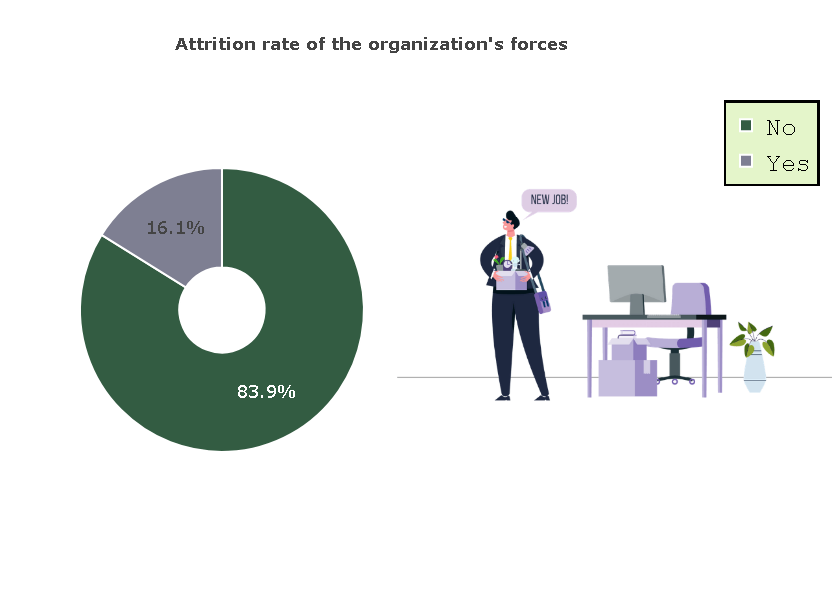

In [22]:
#Tạo dữ liệu
plot_df = df.copy()
plot_df= plot_df['Attrition'].value_counts()

#Trực quan hóa
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"},{"type": "pie"}]],subplot_titles=('',''))
fig.add_trace(go.Pie(values=plot_df.values,labels=plot_df.index,hole=0.3),row=1,col=1)

fig.update_traces(hoverinfo='label',
                  textfont_size = 18,
                  textposition ='auto',
                  marker=dict(colors = ["#335C42","#7E7F92"],
                              line = dict(color = 'white',
                                          width = 2)))
fig.add_layout_image(
    dict(
        source="https://raw.githubusercontent.com/ntclai/PictureForMyProject/main/Voluntary-Resignation--1-.png",
        xref="paper",
        yref="paper",
        x=1.2, y=0.25,
        sizex=0.7, sizey=1,
        xanchor="right", yanchor="bottom", sizing= "contain",
    )
)

fig.update_layout(title ={'text' : "<b>Attrition rate of the organization's forces</b>", 
                          'x' : 0.21},
                    template = 'xgridoff',
                    width = 900, height = 600,
                    legend=dict(title_font_family="Times New Roman",
                                font=dict(family="Courier",size=25,color="black" ),
                    bgcolor="#E4F5CA",
                    bordercolor="Black",
                    borderwidth=2.5)
                 )
iplot(fig)

#### <span style='color:#2B9C15 '>💬 Nhận xét </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding: 5px;background-color:#ebfae8;font-size:110%;text-align:left">
    
- Tỉ lệ nhân viên thôi việc của tổ chức này là 16.1%. Và theo các chuyên gia về lĩnh vực nhân sự cho rằng, tỷ lệ tiêu hao nhân lực của mỗi doanh nghiệp từ 4% đến 6% là mức ổn định.

=> Tỉ lệ thôi việc của tổ chức này đang ở mức nguy hiểm. Do đó tổ chức nên có các biện pháp để làm giảm tỉ lệ này.

<a id="3.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>| Biểu đồ </b> 2 📉</h2>

**Tiêu đề:** Tỉ lệ nam nữ trong tổ chức.

**Loại biểu đồ:** Pie chart (biểu đồ tròn).

**Lý do lựa chọn:** 
- Pie chart là lựa chọn hợp lí vì nó cấp cho chúng ta cái nhìn tổng thể về tỷ lệ của các phần khác nhau tạo thành một tập dữ liệu.

- Tuy nhiên, khi có quá nhiều phần tử cần hiển thị, trực quan hóa với Pie Chart có thể trở nên khó hiểu và làm giảm tính rõ ràng của dữ liệu. Ở đây thuộc tính Gender chỉ có 2 giá trị là Male và Female nên pie chart sẽ thể hiện được hết khả năng trực quan hóa của nó.

**Trực quan hóa:**

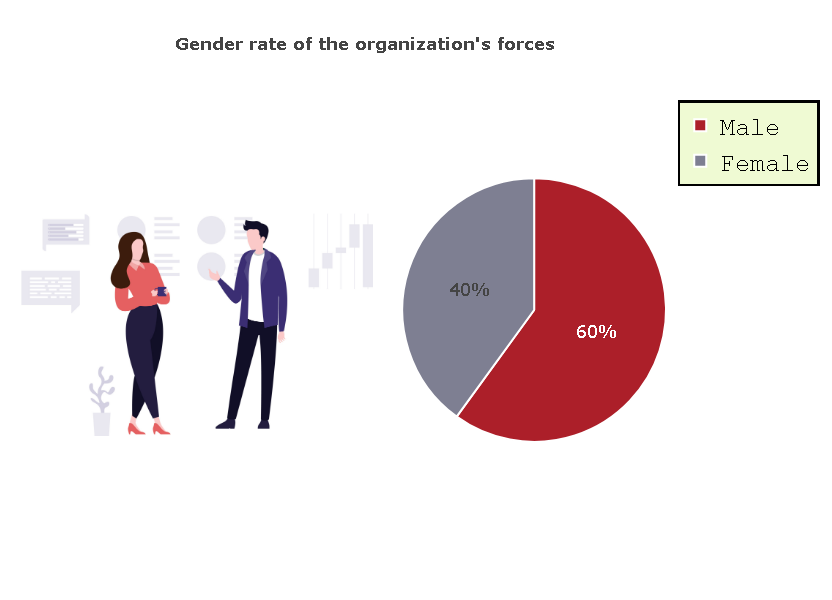

In [23]:
#Tạo dữ liệu
plot_df = df.copy()
plot_df= plot_df['Gender'].value_counts()

#Trực quan hóa
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"},{"type": "pie"}]],subplot_titles=('',''))
fig.add_trace(go.Pie(values=plot_df.values,labels=plot_df.index),row=1,col=2)

fig.update_traces(hoverinfo='label',
                  textfont_size = 18,
                  textposition ='auto',
                  marker=dict(colors = ["#AC1F29","#7E7F92"],
                              line = dict(color = 'white',
                                          width = 2)))
fig.add_layout_image(
    dict(
        source="https://raw.githubusercontent.com/ntclai/PictureForMyProject/main/viz.jpg",
        xref="paper",
        yref="paper",
        x=0.5, y=0.20,
        sizex=0.6, sizey=1,
        xanchor="right", yanchor="bottom", sizing= "contain",
    )
)

fig.update_layout(title ={'text' : "<b>Gender rate of the organization's forces</b>", 
                          'x' : 0.21},
                    template = 'xgridoff',
                    width = 900, height = 600,
                    legend=dict(title_font_family="Times New Roman",
                                font=dict(family="Courier",size=25,color="black" ),
                    bgcolor="#EFFAD3",
                    bordercolor="Black",
                    borderwidth=2.5)
                 )
iplot(fig)

#### <span style='color:#2B9C15 '>💬 Nhận xét </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding: 5px;background-color:#ebfae8;font-size:110%;text-align:left">
    
Số lượng nhân viên nam trong công ty chiếm tỉ lệ nhiều hơn nhân viên nữ (hơn 20%).

<a id="3.3"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>| Biểu đồ </b>3 📉</h2>

**Tiêu đề:** Tỉ lệ các cấp bậc trong công việc

**Loại biểu đồ:** TreeMap

**Lý do lựa chọn:**
Để so sánh tỉ lệ sự phân bố của các cấp độ trong công việc có trong thuộc tính 'Job Level', thì biểu đồ TreeMap là một lựa chọn phù hợp. Vì TreeMap là một loại biểu đồ thống kê hiển thị dữ liệu dưới dạng các hình chữ nhật có diện tích khác nhau, trong đó độ lớn của hình chữ nhật sẽ đại diện cho giá trị lượng của một biến. Ta sẽ biểu diễn số lượng các giá trị có trong thuộc tính 'JobLevel' bằng diện tích các hình chữ nhật.

**Trực quan hóa:**

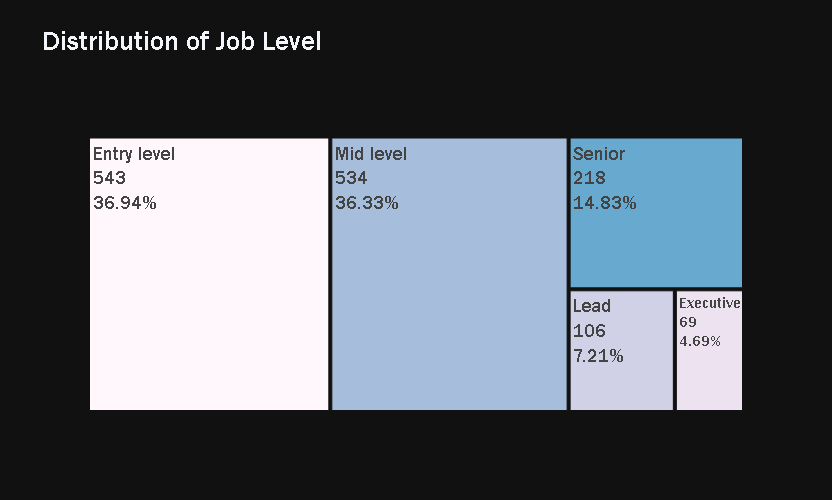

In [24]:
plot_df = df.copy()
plot_df['JobLevel'] = pd.Categorical(
    plot_df['JobLevel']).rename_categories( 
    ['Entry level', 'Mid level', 'Senior', 'Lead', 'Executive'])

plot_df = plot_df['JobLevel'].value_counts()

fig = px.treemap(plot_df, 
                 path=[plot_df.index],
                 values=plot_df.values, 
                 title = 'Distribution of Job Level',
                 color=plot_df.index,
                 color_discrete_sequence=px.colors.sequential.PuBuGn,
                 template='plotly_dark',
                 width=1000, height=500)

percents = np.round((100*plot_df.values / sum(plot_df.values)).tolist(),2)

fig.data[0].customdata = [36.94, 4.69, 7.21, 36.33, 14.83]
fig.data[0].texttemplate = '%{label}<br>%{value}<br>%{customdata}%'

fig.update_layout(
    font=dict(size=19,family="Franklin Gothic"))
fig.show()

#### <span style='color:#2B9C15 '>💬 Nhận xét </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding: 5px;background-color:#ebfae8;font-size:110%;text-align:left">
    
Từ biểu đồ TreeMap, ta thấy:
- 'Entry level' (vị trí công việc của những người có ít kinh nghiệm làm việc) chiếm số lượng lớn nhất với 543 người (chiếm 36.94%), tương ứng với hình chữ nhật có diện tích lớn nhất. Xếp ngay sau đó là 'Mid level' với 534 người (chiếm 36.33%).
- Chiếm tỉ lệ ít nhất là 'Executive' (vị trí cấp cao, có vai trò rất quan trọng trong mỗi phòng ban) với chỉ 69 người (chiếm 4.69%).

=>  Cấp bậc trong công việc càng cao thì số lượng nhân sự càng ít.
    

<a id="3.4"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>| Biểu đồ </b> 4 📉</h2>

**Tiêu đề:** Tỉ lệ các cấp độ trong công việc

**Loại biểu đồ:** BarPlot

**Lý do lựa chọn:**
Để so sánh tỉ lệ bỏ việc của những người ở các cấp độ công việc được lưu vào hai thuộc tính là 'Attrition' và 'JobLevel', thì biểu đồ BarPlot là một lựa chọn phù hợp. Vì BarPlot là một loại biểu đồ thống kê hiển thị dữ liệu dưới dạng các cột có chiều cao khác nhau, trong đó chiều cao của cột sẽ đại diện cho giá trị lượng của một biến.

**Trực quan hóa:**

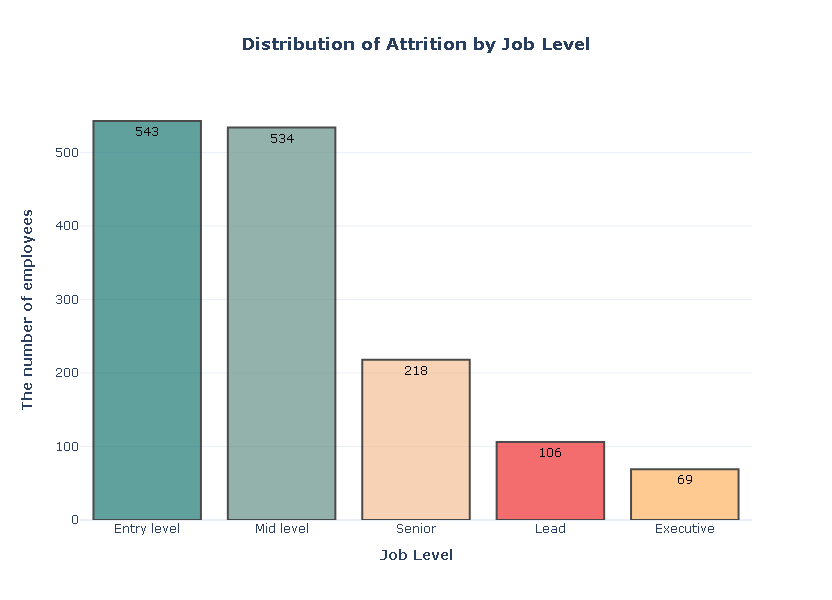

In [25]:
#Tạo dữ liệu
plot_df = df.copy()
plot_df['JobLevel'] = pd.Categorical(
    plot_df['JobLevel']).rename_categories( 
    ['Entry level', 'Mid level', 'Senior', 'Lead', 'Executive'])

plot_df= plot_df['JobLevel'].value_counts()

#Trực quan hóa
colors = ["#1d7874","#679289","#f4c095","#ee2e31","#ffb563","#918450"]
data = go.Bar(x=plot_df.index, y = plot_df.values, text = plot_df.values , textposition ='inside',
              textfont = dict(size = 12,
                             color = 'black'),
              marker = dict(color = colors,
                            opacity = 0.7,
                            line_color = 'black',
                            line_width = 2))
layout = go.Layout(title = {'text': "<b>Distribution of Attrition by Job Level</b>",
                           'x':0.5,
                           'xanchor': 'center'},
                   xaxis = dict(title='<b>Job Level</b>'),
                   yaxis =dict(title='<b>The number of employees</b>'),
                   width = 900,
                   height = 600,
                   template = 'plotly_white')
fig=go.Figure(data = data, layout = layout)

iplot(fig)

#### <span style='color:#2B9C15 '>💬 Nhận xét </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding: 5px;background-color:#ebfae8;font-size:110%;text-align:left">

Dựa vào biểu đồ cột ở trên ta có thể thấy:
- Nhân viên ở Level 1 (Entry level) có tỷ lệ rời khỏi công ty rất cao (60%). Họ thường là những người rất trẻ.
- Nhân viên ở Level 2 (Middle Level) có tỷ lệ rời khỏi tương đối cao (21%)
- Những nhân viên đạt được Level 4 (Lead) và 5 (Executive) có tỷ lệ rời khỏi rất ít.
  
=> Những nhân viên _trẻ_ mới vào công ty có khả năng _"nhảy việc"_ rất cao.

<a id="3.5"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>| Biểu đồ </b> 5 📉</h2>

**Tiêu đề:** Phân bố mức độ làm việc tăng ca trong công việc ở các vai trò công việc.

**Loại biểu đồ:** Stacked bar chart.

**Lý do lựa chọn:**
So sánh số lượng nhân viên làm việc tăng ca ở các vai trò công việc khác nhau, biểu đồ cột chồng là phù hợp vì thể hiện được tổng số lượng và cả số lượng của mỗi thành phần trong nó.
**Trực quan hóa:**

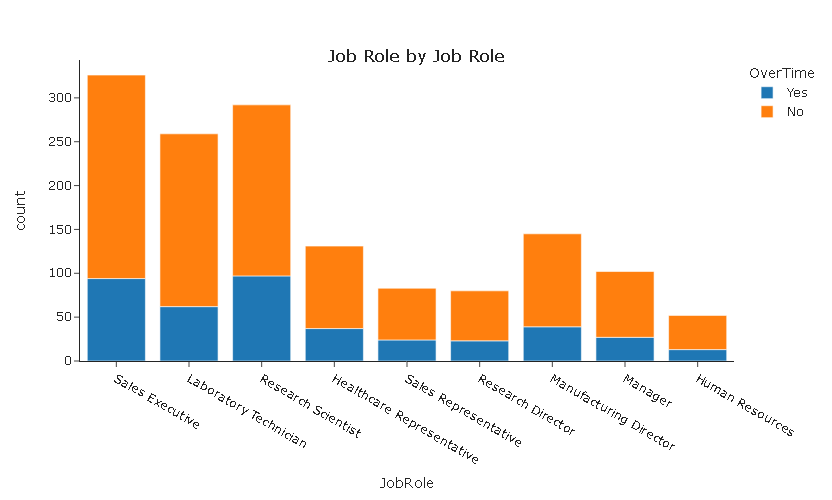

In [26]:
fig = px.histogram(data_frame = df, x = 'JobRole', color = 'OverTime',
                 width=1000, height=500, template="simple_white")

fig.update_layout(
    title={
        'text': "Job Role by Job Role",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

#### <span style='color:#2B9C15 '>💬 Nhận xét </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding: 5px;background-color:#ebfae8;font-size:110%;text-align:left">
    
- 3 vị trí nhiều nhân sự nhất là: Sale Executive, Research Scientist và Laboratory Technician.
- Tỉ lệ làm việc OverTime gấp gần 2 lần nhóm không làm việc quá giờ. Xu hướng làm việc OT đang ngày càng phổ biến.

<a id="3.6"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>| Biểu đồ </b> 6 📉</h2>

**Tiêu đề:** Mối quan hệ giữa tỉ lệ rời đi và sự hài lòng về môi trường làm việc.

**Loại biểu đồ:** Bar chart + line plot.

**Lý do lựa chọn:** Dùng line plot đếm số lượng nhân viên theo từng nhóm đánh giá hài lòng về môi trường làm việc ở 4 mức 1, 2, 3, 4. Sau đó tính tỉ lệ rời đi trong nhóm đó và vẽ các tỉ lệ bằng bar chart.

**Trực quan hóa:**

In [27]:
#Tạo dữ liệu
new_df=df.groupby('EnvironmentSatisfaction').count()
idx=list(new_df.index) #get groups as group 1, group 2, group 3, group 4 
count=list(new_df['Age'].values)

percent_dropout=[] #list contains employees dropout percent
for i in range(len(idx)):
    percent_dropout.append(round((len(df[df['EnvironmentSatisfaction']==idx[i]][df['Attrition']=='Yes'])/count[i])*100,3))

C:\Users\t480\AppData\Local\Temp\ipykernel_4300\4025534587.py:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [28]:
envSat_attrition_df={idx[i]:[count[i],percent_dropout[i]] for i in range(len(idx))}
envSat_attrition_df['Thống kê']=['Số lượng nhân viên','Phần trăm nghỉ việc']
envSat_attrition_df=pd.DataFrame(envSat_attrition_df).set_index('Thống kê')
envSat_attrition_df.head()

1        2        3        4
Thống kê                                               
Số lượng nhân viên   284.000  287.000  453.000  446.000
Phần trăm nghỉ việc   25.352   14.983   13.687   13.453

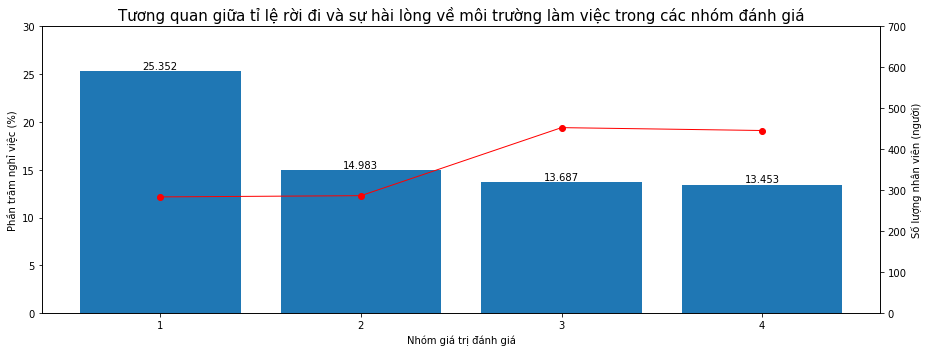

In [29]:
groups=['1','2','3','4']
fig,ax1=plt.subplots(figsize=(13,5))# bar chart
bars=ax1.bar(groups,envSat_attrition_df.loc[['Phần trăm nghỉ việc']].values[0])
for rect in bars:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.3f}', ha='center', va='bottom')
ax2=ax1.twinx()
ax2.plot(groups,envSat_attrition_df.loc[['Số lượng nhân viên']].values[0],lw=1,marker='o',color='r')
ax1.set(xlabel='Nhóm giá trị đánh giá', ylabel='Phần trăm nghỉ việc (%)')
ax2.set(ylabel='Số lượng nhân viên (người)')
ax1.set_ylim(0,30)
ax2.set_ylim(0,700)
ax1.set_title(f'Tương quan giữa tỉ lệ rời đi và sự hài lòng về môi trường làm việc trong các nhóm đánh giá', size=15)
fig.tight_layout()
plt.show();

#### <span style='color:#2B9C15 '>💬 Nhận xét </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding:5px;background-color:#ebfae8;font-size:110%;text-align:left">
    
- Số lượng nhân viên hài lòng về môi trường làm việc cũng rất cao tương tự hài lòng về công việc.
- Tỉ lệ rời đi trung bình ở các nhóm đánh giá thấp về môi trường làm việc cao hơn so với các nhóm đánh giá cao. Điều này cũng rất hợp lí với thực tế.
- Từ đây cho thấy bên cạnh tiền lương thì yếu tố môi trường làm việc cũng là yếu quan trọng quyết định lớn đến việc nhân viên có thật sự gắn bó lâu dài hay không.

<a id="3.7"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>| Biểu đồ </b> 7 📉</h2>

**Tiêu đề:** Mức lương trung bình thay đổi như thế nào theo số năm làm việc tại công ty?

**Loại biểu đồ:** Line chart

**Lý do lựa chọn:**
Biểu đồ line chart là một cách hiệu quả để thể hiện các xu hướng tăng giảm hoặc sự biến động của dữ liệu qua thời gian. Do đó ta dùng line chart để xem xét sự thay đổi mức lương trung bình của nhân viên trong công ty theo số năm làm việc.

**Trực quan hóa:**

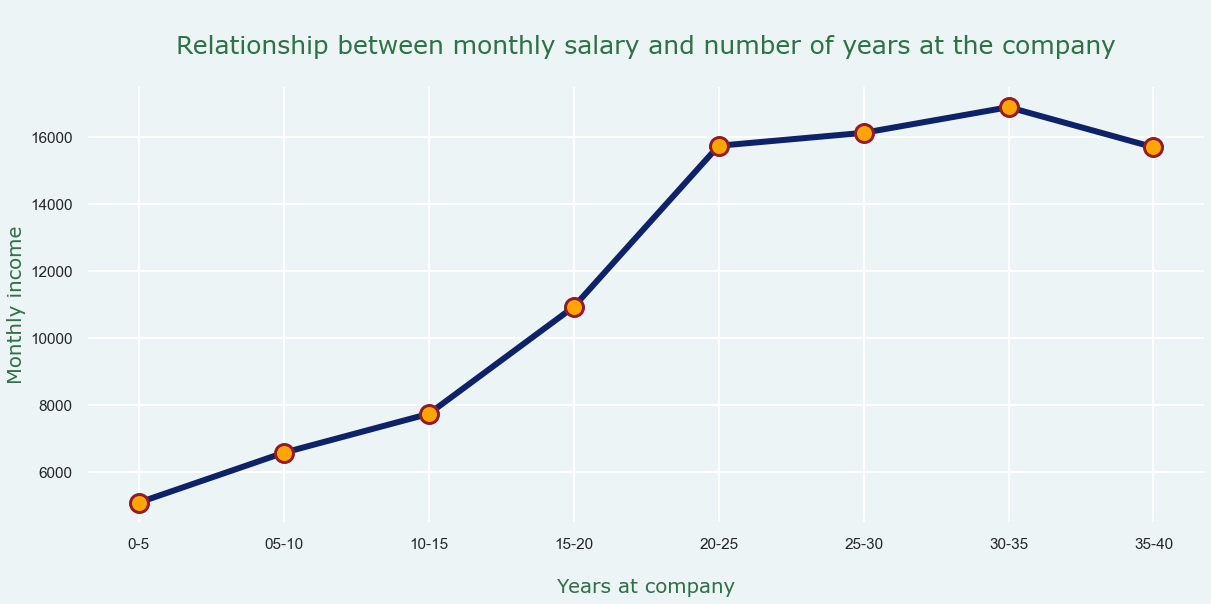

In [30]:
#Tạo dữ liệu cần thiết
temp=df.copy()
conditions=[(temp['YearsAtCompany']>=0) & (temp['YearsAtCompany']<=5),
            (temp['YearsAtCompany']>5) & (temp['YearsAtCompany']<=10),
            (temp['YearsAtCompany']>10) & (temp['YearsAtCompany']<=15),
            (temp['YearsAtCompany']>15) & (temp['YearsAtCompany']<=20),
            (temp['YearsAtCompany']>20) & (temp['YearsAtCompany']<=25),
            (temp['YearsAtCompany']>25) & (temp['YearsAtCompany']<=30),
            (temp['YearsAtCompany']>30) & (temp['YearsAtCompany']<=35),
            (temp['YearsAtCompany']>35) & (temp['YearsAtCompany']<=40)]
values=['0-5','05-10','10-15','15-20','20-25','25-30','30-35','35-40']
temp['YearsRange']=np.select(conditions, values)

plot_df=temp.groupby(['YearsRange'])['MonthlyIncome'].mean().reset_index()

#Trực quan hóa
sns.set(rc={"axes.facecolor":"#ECF4F5","figure.facecolor":"#ECF4F5"})
sns.set_context("poster",font_scale = .7)
plt.subplots(figsize=(20,8))
p=sns.lineplot(x=plot_df["YearsRange"] ,y=plot_df["MonthlyIncome"],data=plot_df,color="#0E2269",marker="o",linewidth=6,markersize=18,markerfacecolor="orange",markeredgecolor="#921D26",markeredgewidth=3)
p.axes.set_title("\nRelationship between monthly salary and number of years at the company\n",fontsize=25, color="#307149", family ='Verdana')
p.axes.set_xlabel("\nYears at company",fontsize=20, color="#307149", family ='Verdana')
p.axes.set_ylabel("Monthly income",fontsize=20, color="#307149", family ='Verdana')
sns.despine(left=True, bottom=True)
plt.show()

#### <span style='color:#2B9C15 '>💬 Nhận xét </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding: 5px;background-color:#ebfae8;font-size:110%;text-align:left">
    
- Trong khoảng thời gian gắn bó với công ty từ 0-35 năm, mức lương trung bình của nhân viên tăng dần theo thời gian gắn bó. Điều này chứng tỏ khi thâm niên làm việc làm lâu thì nhân viên đó sẽ có kinh nghiệm làm việc càng nhiều và là một nhân viên trung thành với công ty. Nên có được mức lương hậu hĩnh là điều xứng đáng.

- Tuy nhiên, mức lương cho khoảng thời gian làm việc từ 35-40 năm lại sụt giảm nhưng không quá lớn. Nguyên nhân sự sụt giảm này có thể là khi đã gắn bó với công ty từ 35-40 năm, thì các nhân viên này ở đã độ tuổi sắp nghỉ hưu nên năng suất làm việc giảm hoặc họ đã nhường lại các vị trí cấp cao cho lớp trẻ lãnh đạo,...

<a id="3.8"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>| Biểu đồ </b> 8 📉</h2>

**Tiêu đề:** Mức độ đi công tác ở mỗi phòng ban

**Loại biểu đồ:** Radar chart

**Lý do lựa chọn:** Radar Chart là một biểu đồ đa diện được sử dụng để biểu thị dữ liệu đa chiều với các đặc trưng cho trước được đặt ở các trục khác nhau. Khi áp dụng cho thuộc tính 'Department' và 'BusinessTravel' ta sẽ có được tỉ lệ mức độ đi công tác của từng phòng ban, trong đó:
- Mức độ đi công tác (Non-Travel, Travel_Frequently,Travel_Rarely): sẽ nằm ở các trục có chia tỷ tệ.
- Màu sắc hình đa diện đại diện cho tên phòng ban (Human_Resource, Research_Development, Sales).

**Trực quan hóa:**

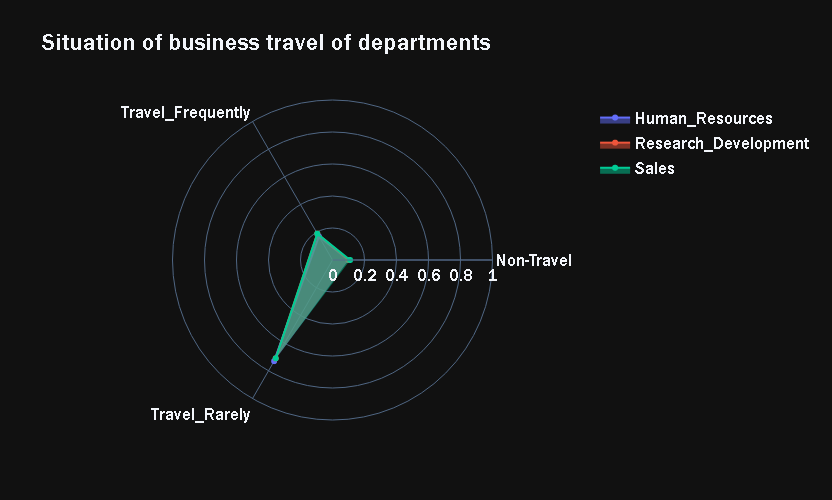

In [31]:
plot_df = df.groupby(['Department','BusinessTravel']).size()
Human_Resources=np.round(plot_df['Human Resources'].values/(plot_df['Human Resources'].values.sum()),2)
Research_Development=np.round(plot_df['Research & Development'].values/(plot_df['Research & Development'].values.sum()),2)
Sales=np.round(plot_df['Sales'].values/(plot_df['Sales'].values.sum()),2)

categories = ['Non-Travel', 'Travel_Frequently','Travel_Rarely']
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
             r = Human_Resources, 
             theta = categories,
             fill = 'toself',
             name = 'Human_Resources'
             ))
fig.add_trace(go.Scatterpolar(
             r = Research_Development, 
             theta = categories,
             fill = 'toself',
             name = 'Research_Development'
             ))
fig.add_trace(go.Scatterpolar(
             r = Sales, 
             theta = categories,
             fill = 'toself',
             name = 'Sales'
             ))
fig.update_layout(
    polar=dict(
    radialaxis=dict(
        range=[0, 1]
    )),
    font = dict(family="Franklin Gothic", size=17),
    showlegend=True,
    title = 'Situation of business travel of departments',
    height = 500,
    width = 1000
)
fig.layout.template = 'plotly_dark'
fig.show()

#### <span style='color:#2B9C15 '>💬 Nhận xét </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding: 5px;background-color:#ebfae8;font-size:110%;text-align:left">

Dựa vào biểu đồ Radar chart bên trên, ta có thể thấy: 
- Các hình tam giác gần như xếp chồng lên nhau, cho thấy mức độ đi công tác ở các phòng ban khá tương đồng.
- Tỉ lệ 'Travel_Rarely' (hiếm khi đi công tác) là lớn nhất và 'Non-Travel' (không bao giờ đi công tác) là thấp nhất ở tất cả các phòng ban. Tỷ lệ này khá phổ biến ở các công ty, do thông thường việc đi công tác hay thuộc về các vị trí có cấp bậc cao trong công việc, và cấp bậc càng cao thì số lượng nhân sự càng ít (được minh chứng ở biểu đồ 1).

<a id="3.9"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>| Biểu đồ </b> 9 📉</h2>

**Tiêu đề:** Tỉ lệ nhân viên theo độ tuổi trong công ty.

**Loại biểu đồ:** TreeMap

**Lý do lựa chọn:**
Để so sánh tỉ lệ sự phân bố của độ tuổi có trong thuộc tính 'Age_Range' được biến đổi từ thuộc tính 'Age', thì biểu đồ TreeMap là một lựa chọn phù hợp. Vì TreeMap là một loại biểu đồ thống kê hiển thị dữ liệu dưới dạng các hình chữ nhật có diện tích khác nhau, trong đó độ lớn của hình chữ nhật sẽ đại diện cho giá trị lượng của một biến. Ta sẽ biểu diễn số lượng các giá trị có trong thuộc tính 'Age_Range' bằng diện tích các hình chữ nhật.

**Xử lý dữ liệu:**

In [32]:
new_df = df.loc[:, ['Age', 'Attrition','BusinessTravel','Department','EducationField','EnvironmentSatisfaction',
                     'Gender','JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus',
                     'MonthlyIncome','Over18','OverTime','StockOptionLevel','TotalWorkingYears','YearsAtCompany',
                     'YearsInCurrentRole','YearsWithCurrManager']]
new_df['Attrition'] = new_df['Attrition'].replace('Yes', 1).replace('No', 0)


In [33]:
dodi = new_df.copy()
conditions = [(dodi['Age'] >= 18) & (dodi['Age'] <= 20),
              (dodi['Age'] > 20) & (dodi['Age'] <= 25),
              (dodi['Age'] > 25) & (dodi['Age'] <= 30),
              (dodi['Age'] > 30) & (dodi['Age'] <= 35),
              (dodi['Age'] > 35) & (dodi['Age'] <= 40),
              (dodi['Age'] > 40) & (dodi['Age'] <= 45),
              (dodi['Age'] > 45) & (dodi['Age'] <= 50),
              (dodi['Age'] > 50) & (dodi['Age'] <= 55),
              (dodi['Age'] > 55) & (dodi['Age'] <= 60)
             ]

values = ['18-20','21-25','26-30','31-35','36-40','41-45','46-50','51-55','56-60']
new_df['Age_Range'] = np.select(conditions, values)

In [34]:
percent_age_range = new_df['Age_Range'].value_counts().values / new_df.shape[0] * 100
for i in range(len(percent_age_range)):
    percent_age_range[i] = '{:.2f}'.format(percent_age_range[i])

    plot_df = new_df['Age_Range'].value_counts()
plot_df = pd.DataFrame({'Age_Range': plot_df.index, 'Count': plot_df.values})
plot_df['Percent'] = percent_age_range

**Trực quan hóa:**

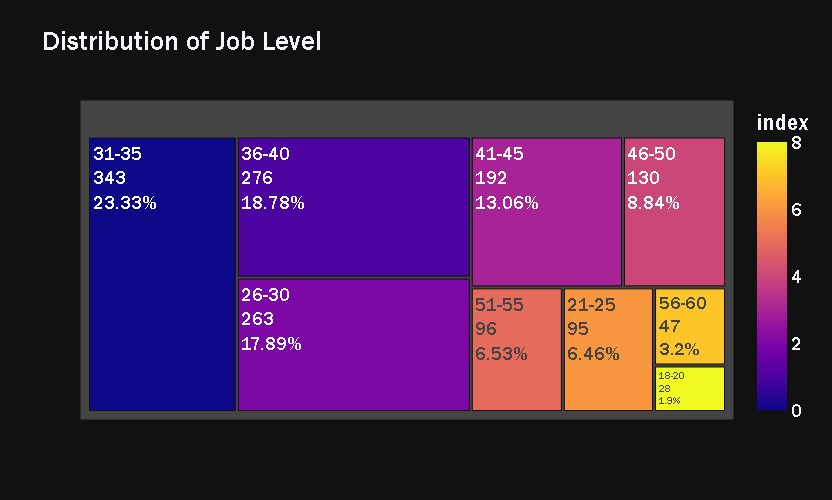

In [35]:
fig = px.treemap(plot_df, 
                 path=['Age_Range'],
                 values='Count', 
                 title = 'Distribution of Job Level',
                 color=plot_df.index,
                 color_discrete_sequence=px.colors.sequential.PuBuGn,
                 template='plotly_dark', hover_data=['Percent'],
                 width=1000, height=500)

fig.data[0].texttemplate = '%{label}<br>%{value}<br>%{customdata[0]}%'

fig.update_layout(
    font=dict(size=19,family="Franklin Gothic"))
fig.show()

#### <span style='color:#2B9C15 '>💬 Nhận xét </span>

<div style="border-radius:10px;border:#0C6A86 solid;padding:5px;background-color:#ebfae8;font-size:110%;text-align:left">
    
- Số nhân viên có độ tuổi trong khoảng 31-35 chiếm tỷ lệ cao nhất (23%)
- Nhân viên trong khoảng độ tuổi 26-30 và 36-40 chiếm tỷ lệ cũng khá cao (18%)
- Số nhân viên trong độ tuổi 18-20 chiếm tỷ lệ thấp nhất (2%).
- Nhân viên trong khoảng độ tuổi 56-60 cũng khá thấp (3%)

=> Đây là phân bố hợp lí vì các độ tuổi chiếm tỷ lệ cao là những độ tuổi có năng suất làm việc hiệu quả nhất.

<a id="3.12"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>| Biểu đồ </b> 10 📉</h2>

**Tiêu đề:** Sự khác biệt về mức lương hằng tháng giữa các cấp bậc trong công việc

**Loại biểu đồ:** Violin plot

**Lý do lựa chọn:** Biểu đồ violin plot thường được sử dụng với dữ liệu liên tục hoặc dữ liệu số. Nó rất hữu ích để hiển thị phân phối của một biến dữ liệu và so sánh phân phối đó giữa nhiều nhóm. Do đó để xem xét sự phân bố và so sánh phân phối dữ liệu theo mức lương giữa các cấp bậc có trong thuộc tính "JobLevel" thì Violin plot là lựa chọn lý tưởng.

**Trực quan hóa:**

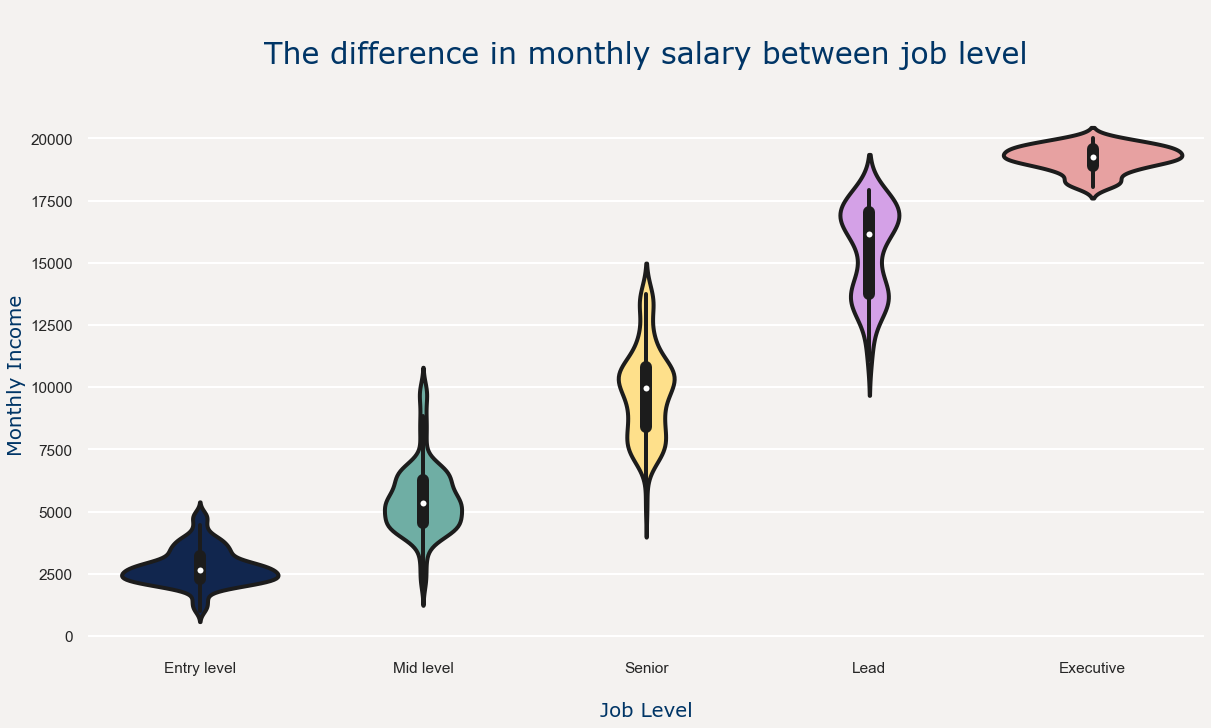

In [36]:
palette = ["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"]
sns.set(rc={"axes.facecolor":"#F4F2F0","figure.facecolor":"#F4F2F0"})
sns.set_context("poster",font_scale = .7)

plot_df = df.copy()
plot_df['JobLevel'] = pd.Categorical(
    plot_df['JobLevel']).rename_categories( 
    ['Entry level', 'Mid level', 'Senior', 'Lead', 'Executive'])

plt.subplots(figsize=(20, 10))

p=sns.violinplot(x=plot_df["JobLevel"],y=plot_df["MonthlyIncome"],order=plot_df["JobLevel"].value_counts().index,palette=palette,saturation=1,linewidth=4,edgecolor="black")
p.axes.set_title("\nThe difference in monthly salary between job level\n",fontsize=30, family ='Verdana', color ='#003566')
p.axes.set_xlabel("\nJob Level",fontsize=20, family ='Verdana', color ='#003566')
p.axes.set_ylabel("Monthly Income",fontsize=20, family ='Verdana', color ='#003566')

sns.despine(left=True, bottom=True)


#### <span style='color:#2B9C15 '>💬 Nhận xét </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding: 5px;background-color:#ebfae8;font-size:110%;text-align:left">
    
Dựa vào biểu đồ Violin plot bên trên, ta có nhận xét:
- Một điều hiển nhiên dễ thấy là nhân viên có cấp bậc trong công việc càng cao thì thu nhập hằng tháng càng nhiều.
- Cấp bậc Mid level, Senior, Lead có phạm vi phân bố mức lương rộng, có thể xem là có nhiều giá trị ngoại lai (outlier).

<a id="3.11"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>| Biểu đồ </b> 11 📉</h2>

**Tiêu đề:** Tình trạng hôn nhân có liên quan gì với quyết định thôi việc hay không?

**Loại biểu đồ:** Countplot

**Lý do lựa chọn:** 


**Trực quan hóa:**

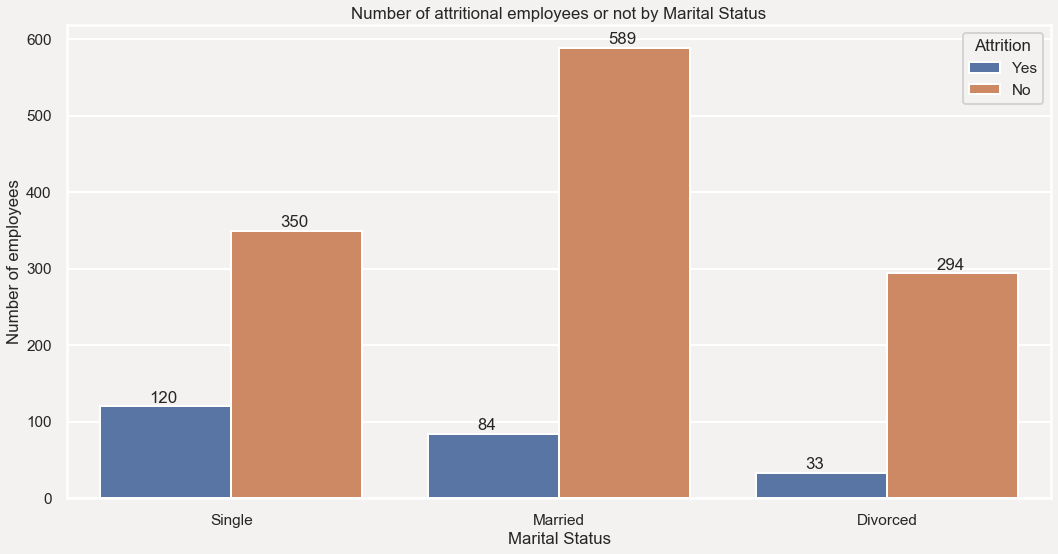

In [37]:
plt.rcParams["figure.figsize"] = [15, 8]
plt.rcParams["figure.autolayout"] = True
g = sns.countplot(x='MaritalStatus', hue='Attrition', data=df)
g.set(title='Number of attritional employees or not by Marital Status')
g.set_xlabel('Marital Status')
g.set_ylabel('Number of employees')
g.set_yticks(range(0, 700, 100))
for p in g.patches:
    g.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+5))
plt.show()

#### <span style='color:#2B9C15 '>💬 Nhận xét </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding: 5px;background-color:#ebfae8;font-size:110%;text-align:left">
    
Dựa vào biểu đồ cột ghép ta có nhận xét:
- Tỉ lệ nhân viên đã kết hôn chiếm số lượng lớn nhất, điều này hoàn toàn phù hợp khi độ tuổi nhân viên công ty này từ 26-40 chiếm khoảng 60% (biểu đồ 9), đây là độ tuổi phù hợp để lập gia đình.
- Tỉ lệ nhân viên độc thân tuy đứng thứ 2 nhưng lại có tỉ lệ nghỉ việc cao nhất. Điều này có thể thấy những người trẻ tuổi và tự do (không vướn bận gia đình) có xu hướng "nhảy việc" để trải nghiệm nhiều môi trường làm việc khác nhau và tìm được công việc phù hợp với sở thích.

<a id="3.12"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>| Biểu đồ </b> 12 📉</h2>

**Tiêu đề:** Thu nhập hàng tháng theo tổng số năm làm việc và cấp bậc trong công việc

**Loại biểu đồ:** Scatter plot

**Lý do lựa chọn:** 
- Scatter plot là một công cụ mạnh mẽ để thể hiện quan hệ giữa hai biến số liên tục là 'MonthlyIcome' và 'TotalWorkingYears'. Ngoài ra để phân loại điểm dữ liệu thuộc 'JobLevel' nào ta có thể dùng tham số 'color', hoặc để thể hiện độ lớn của 'MonthyIncome' ta có thể sử dụng tham số 'size' trong syntax của Scatter plot để biểu thị.

**Trực quan hóa:**

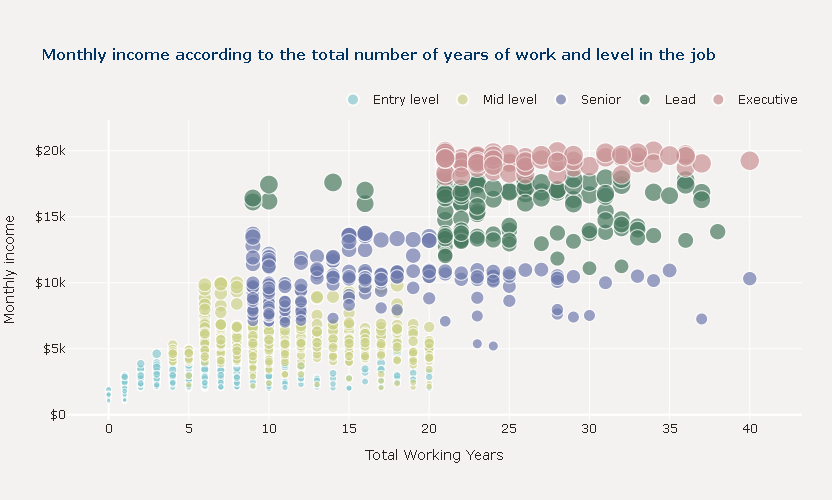

In [38]:
plot_df = df.copy()
plot_df['JobLevel'] = pd.Categorical(
    plot_df['JobLevel']).rename_categories( 
    ['Entry level', 'Mid level', 'Senior', 'Lead', 'Executive'])
col=['#88C9D1', '#CCD188', '#707BAD', '#48795E','#C99193']
fig = px.scatter(plot_df, x='TotalWorkingYears', y='MonthlyIncome', 
                 color='JobLevel', size='MonthlyIncome',
                 color_discrete_sequence=col, 
                 category_orders={'JobLevel': ['Entry level', 'Mid level', 'Senior', 'Lead', 'Executive']})

fig.update_layout(legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
                  title='<b>Monthly income according to the total number of years of work and level in the job </b>',
                  title_font = dict(size = 15, family ='Verdana', color ='#003566'),
                  xaxis_title='Total Working Years', yaxis=dict(title='Monthly income',tickprefix='$'), 
                  legend_title='', font_color='#28221D',
                  margin=dict(l=40, r=30, b=80, t=120),paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0',
                  height = 500,
                  width = 1000)
fig.show()

#### <span style='color:#2B9C15 '>💬 Nhận xét </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding: 5px;background-color:#ebfae8;font-size:110%;text-align:left">
    
Dựa vào biểu đồ phân tán (scatter plot) bên trên, ta có thể thấy:
- Cấp bậc trong công việc càng cao thì thu nhập hằng tháng có xu hướng càng nhiều.
- Các cấp bậc như : Entry level, Mid level có số năm làm việc trong khoảng từ 0 - 20 năm. Trong khi để có thể ở vị trí cao nhất là Executive thì cần số năm làm việc trên 20 năm, thậm chí trên 35 năm.

<a id="3.13"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>| Biểu đồ </b> 13 📉</h2>

**Tiêu đề:** Mức độ hài lòng và cân bằng trong công việc theo độ tuổi.

**Loại biểu đồ:** Line plot

**Lý do lựa chọn:**
Để trực quan sự thay đổi mức độ đánh giá theo độ tuổi, line plot là một loại biểu đồ thích hợp. Vì các điểm dữ liệu có giá trị gần nhau và nằm khoảng giá trị khá nhỏ, nên thang đo đánh giá không bắt đầu từ 1. Điều này không ảnh hưởng đến độ chính xác trong đánh giá vì biểu đồ chỉ so sánh sự cao thấp giữa các giá trị, không đánh giá gấp bao nhiêu lần,... 

**Trực quan hóa:**

In [39]:
def year_stats(year):
    return year//5;

df_ = df.copy()
df_['year_stats'] = df_['YearsAtCompany'].map(year_stats)

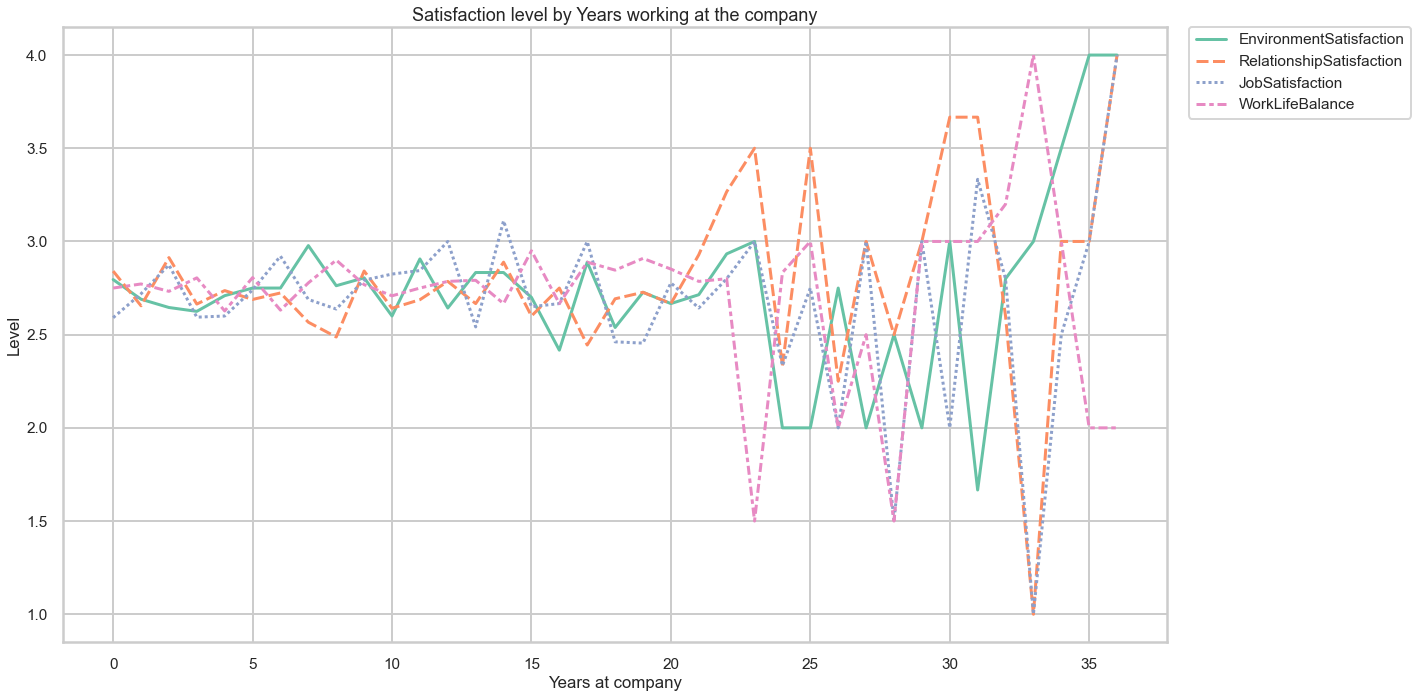

In [40]:
df_satis = df_[['EnvironmentSatisfaction','RelationshipSatisfaction', 'JobSatisfaction','WorkLifeBalance', 'YearsAtCompany', 'year_stats']]
df_satis_year = df_satis.groupby('YearsAtCompany')[['EnvironmentSatisfaction','RelationshipSatisfaction','WorkLifeBalance', 'JobSatisfaction']].mean().reset_index()
sns.set_palette("Set2")
sns.set_style('whitegrid')
plt.subplots(figsize=(20, 10))
sns.lineplot(data = df_satis_year[['EnvironmentSatisfaction','RelationshipSatisfaction', 'JobSatisfaction','WorkLifeBalance']])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Satisfaction level by Years working at the company', fontsize = 18)

plt.xlabel('Years at company')
plt.ylabel('Level')
plt.show()

#### <span style='color:#2B9C15 '>💬 Nhận xét </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding: 5px;background-color:#ebfae8;font-size:110%;text-align:left">
    
- Có sự khác biệt rõ rệt giữa sự hài lòng của nhân viên theo độ tuổi, được phân cách rõ rệt ở năm làm việc thứ 20.
- Nhóm dưới 20 tuổi: ít có biến động hơn, dao động ở mức 2.5-3.
- Nhóm trên 20 tuổi:
    - Biến động nhiều hơn. Càng gắn bó với công ty, càng tiếp cận được nhiều khía cạnh khác nhau của công việc, nhu cầu mà mọi người đòi hỏi trong công việc cũng đa dạng hơn.
    - Work-life balance thường xu hướng ngược lại so với các đặc điểm còn lại. Điều này thể hiện sự hài lòng trong công việc ở 3 khía cạnh (môi trường, mối quan hệ, công việc) thường song hành và có liên quan với nhau. Ngoài ra sự hài lòng còn là động lực lớn với employees, họ có xu hướng dành nhiều thời gian cho công việc hơn. Từ đó thời gian cho các hoạt động khác của cuộc sống cũng giảm, ảnh hưởng work-life balance. 
    - Càng gắn bó với công ty, sự ảnh hưởng ngày càng rõ rệt. Dù khi đó employees đã có kinh nghiệm làm việc ở công ty đó.
    

<a id="3.14"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>| Biểu đồ </b> 14 📉</h2>

**Tiêu đề:** Phân bố mức lương theo vị trí công việc và mức độ hài lòng của mọi người.

**Loại biểu đồ:** Dot and jitter plot.

**Lý do lựa chọn:**
Để trực quan sự phân bố giữa các categorical variables khác nhau, ta chọn jitter plots. Sau đó ta thêm việc trực quan Attrition vote của nhân viên qua việc thể hiện các chấm dữ liệu bằng các màu sắc khác nhau. Từ đó có thể nhìn thấy sự liên quan về mức lương với attrition vote giữa nhân viên ở các vai trò công việc khác nhau.
**Trực quan hóa:**

In [41]:
df_['satisfaction'] = (df_['JobSatisfaction'] + df_['EnvironmentSatisfaction'] + df_['RelationshipSatisfaction'])/3

In [42]:
stripplot =  alt.Chart(df_, width=120,  title="Monthly income by Job Roles and Attrition rate").mark_circle(size=11).encode(
    #color = "Attrition",
    color=alt.Color('Attrition', scale=alt.Scale(scheme='dark2')),
    x=alt.X(
        'jitter:Q',
        title=None,
        axis=alt.Axis(values=[0], ticks=True, grid=False, labels=False),
        scale=alt.Scale()
    ),
    y=alt.Y('MonthlyIncome:Q'),
    #color=alt.Color('JobRole:N', legend=None),
    column=alt.Column(
        'JobRole:N',
        header=alt.Header(
            labelAngle=0,
            titleOrient='top',
            labelOrient='bottom',
            labelAlign='center',
            labelPadding=10,
        ),
    ),
    
    tooltip = ["JobRole", "MonthlyIncome"]
).transform_calculate(
    # Generate Gaussian jitter with a Box-Muller transform
    jitter='sqrt(-2*log(random()))*cos(2*PI*random())'
).configure_facet(
    spacing=0
).properties(
    width=125,
    height=500
).configure_title(
    fontSize=20,
    anchor='middle',  # <---- does not take effect, why?
    color='gray'
)
stripplot

alt.Chart(...)

#### <span style='color:#2B9C15 '>💬 Nhận xét </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding: 5px;background-color:#ebfae8;font-size:110%;text-align:left">

- Phân bố mức lương của các vị trí công việc có sự khác biệt. Trong đó cao nhất là Manager và Research Director, đây là các vị trí quản lý. Đây cũng là 2 nhóm có số lượng nhân viên "hối hận" thấp nhất.
- Vị trí Human Resources có số lượng ít nhưng range lương cũng trải ra một khoảng khá rộng, thể hiện dù nghề này ít nhân sự nhưng mức lương cũng có sự đa dạng giữa các cá nhân.
- Khi phân chia về Attrition rating, ta thấy có sự phân nhóm khá rõ nét với 2 vị trí là Human Resources và Sales Representative. Những người vote Yes thì nằm ở nhóm có mức lương thấp hơn, do đó có thể thấy mức lương ảnh hưởng nhiều đến đánh giá của nhân viên về công việc ở hai ngành này. Các ngành còn lại, Attrition vote không có sự khác biệt nhiều ở các rank lương (các dot nằm khá trộn lẫn vào nhau).

<a id="3.15"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>| Biểu đồ </b> 15 📉</h2>

**Tiêu đề:** Tên các lĩnh vực học tập thể hiện qua đám mây từ

**Loại biểu đồ:** WordCloud

**Lý do lựa chọn:** Một đám mây từ trong Python sẽ biểu thị trực quan cho dữ liệu văn bản. Còn được gọi là đám mây thẻ, nó sử dụng các cỡ chữ và màu sắc khác nhau để làm nổi bật tầm quan trọng của mỗi từ. Bằng cách này sẽ làm nổi trội tên các lĩnh vực học tập của nhân viên (Education Field) để lại ấn tượng cho người xem.

**Trực quan hóa:**

In [43]:
text = " ".join(EducationField for EducationField in df["EducationField"])
wordcloud = WordCloud(width = 800, height = 250, 
            background_color ="black",colormap="RdYlGn",max_font_size=100, stopwords =None,repeat= True).generate(text)
plt.figure(figsize = (20, 8),facecolor= "black") 
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x=0, y=0)
plt.tight_layout(pad = 0) 
plt.show()

#### <span style='color:#2B9C15 '>💬 Nhận xét </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding: 15px;background-color:#ebfae8;font-size:110%;text-align:left">

Có rất nhiều tên nghành học được thể hiện một cách đặc sắc trên WordCloud như: human resources, sciences medical, life sciences, marketing, technical degree, ...

<center> <a href="#top" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>D. Mô hình học máy</b></div>

<a id="4.1"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color:#254E58; background-color: #ffffff;"><b>I. Bài toán đặt ra </b> </h2>

**Bài toán đặt ra:**

Dự đoán liệu rằng nhân viên có nguy cơ nghỉ việc ở công ty đang làm việc hay không?

**Giới thiệu chung:**

- Trong học máy, học có giám sát là một nhóm các thuật toán phổ biến trong lĩnh vực này và một trong những vấn đề quan trọng của học có giám sát là phân loại/phân lớp(classification problem).
- Có 2 dạng classification thường gặp là: binary classification và multiclassification, và trong bài toán mà nhóm đặt ra thì đây là một vấn đề binary classification: từ những thuộc tính đầu vào của một nhân viên như tổng số năm làm việc, mức lương, sự hài lòng về môi trường làm việc, ... dự đoán rằng nhân viên đó nguy cơ nghỉ làm ở công ty hiện tại hay không (Công ty có bị mất mát nhân viên hay không) (0: Không/ 1: Có).
- Nhóm sẽ tạo một mô hình logistic regression cho bài toán phân loại nhị phân.

<center> <a href="#top" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4.2"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color:#254E58; background-color: #ffffff;"><b>II. Tiền xử lý dữ liệu </b> </h2>

In [44]:
#Copy dữ liệu, tránh sai sót cho phần trực quan

In [45]:
df_copy=df.copy()

<a id="4.2.1"></a>
<h2 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>1. Mã hóa các thuộc tính dạng danh mục về dạng số</b></h2>

In [46]:
#lọc ra các thuộc tính dạng danh mục
cat_cols=df_copy.select_dtypes(exclude=['int32','int64','float32','float64'])
cat_cols.head()

Attrition     BusinessTravel              Department EducationField  Gender  \
0       Yes      Travel_Rarely                   Sales  Life Sciences  Female   
1        No  Travel_Frequently  Research & Development  Life Sciences    Male   
2       Yes      Travel_Rarely  Research & Development          Other    Male   
3        No  Travel_Frequently  Research & Development  Life Sciences  Female   
4        No      Travel_Rarely  Research & Development        Medical    Male   

                 JobRole MaritalStatus Over18 OverTime  
0        Sales Executive        Single      Y      Yes  
1     Research Scientist       Married      Y       No  
2  Laboratory Technician        Single      Y      Yes  
3     Research Scientist       Married      Y      Yes  
4  Laboratory Technician       Married      Y       No

In [47]:
#thống kê số lượng các giá trị riêng biệt trong mỗi thuộc tính danh mục ở trên
count_uvalue=[cat_cols[c].nunique() for c in list(cat_cols.columns)]
count_uvalue

[2, 3, 3, 6, 2, 9, 3, 1, 2]

Một vài nhận xét như sau:
- Cột Over18 chỉ chứa 1 loại giá trị duy nhất là 'Y' chứng tỏ cột này sẽ không ảnh hưởng đến kết quả của việc huấn luyện mô hình.
- Có 3 thuộc tính là Attrition, Gender, và OverTime là có 2 loại giá trị khác nhau, do đó với các thuộc tính này chúng ta có thể mã hóa bằng cách gán nhãn 0/1 cho chúng.
- Đối với các thuộc tính có nhiều hơn 2 loại giá trị, chúng ta sẽ má hõa bằng one-hot vector, lý do sử dụng one-hot mà không dùng ordinal hay label để tránh xảy ra hiện tượng bias do mã hóa thành các giá trị lớn nếu số lượng giá trị lớn.

In [48]:
#xóa thuộc tính 'Over18'
df_copy.drop(['Over18'],axis=1, inplace=True)

In [49]:
#chuyển các thuộc tính danh mục chỉ có 2 giá trị riêng biệt về dạng số bằng cách gán nhãn
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df_copy['Attrition']=label_encoder.fit_transform(df['Attrition'])
df_copy['OverTime']=label_encoder.fit_transform(df['OverTime'])
df_copy['Gender']=label_encoder.fit_transform(df['Gender'])

In [50]:
#chuyển các thuộc tính danh mục có hơn 2 giá trị riêng biệt về dạng số bằng one-hot vector
df_copy=pd.get_dummies(df_copy, columns=['BusinessTravel', 'Department', 'EducationField', 
                               'JobRole', 'MaritalStatus'])

In [51]:
df_copy.head()

Age  Attrition  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0   41          1       1102                 1          2              1   
1   49          0        279                 8          1              1   
2   37          1       1373                 2          2              1   
3   33          0       1392                 3          4              1   
4   27          0        591                 2          1              1   

   EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  ...  \
0               1                        2       0          94  ...   
1               2                        3       1          61  ...   
2               4                        4       1          92  ...   
3               5                        4       0          56  ...   
4               7                        1       1          40  ...   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                              0                0   
1                              0                0   
2                              1                0   
3                              0                0   
4                              1                0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                           0                        1   
1                           1                        0   
2                           0                        0   
3                           1                        0   
4                           0                        0   

   JobRole_Sales Representative  MaritalStatus_Divorced  \
0                             0                       0   
1                             0                       0   
2                             0                       0   
3                             0                       0   
4                             0                       0   

   MaritalStatus_Married  MaritalStatus_Single  
0                      0                     1  
1                      1                     0  
2                      0                     1  
3                      1                     0  
4                      1                     0  

[5 rows x 53 columns]

<a id="4.2.2"></a>
<h2 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>2. Loại những thuộc tính không có ý nghĩa cho bài toán</b></h2>

**Cách 1:**
- **Cách thô sơ nhất có thể nghĩ đến là cách loại các thuộc tính có thể thấy ngay về mặt ý nghĩa là không cần thiết cho bài toán phân loại:** Ví dụ thuộc tính 'Over18' được loại bỏ ở trên do chúng chỉ mang một giá trị 'yes', dễ hiểu khi bộ dữ liệu được cung cấp bởi IBM, có trụ sở ở Mỹ và nước Mỹ chỉ cho phép đi làm khi đủ 18 tuổi trở lên. Ngoài ra khi nhìn vào bảng ý nghĩa các thuộc tính mà nhóm đã cung cấp ở phần thu thập dữ liệu thì cột 'StandardHours' cũng sẽ không có ý nghĩa cho bài toán vì cột này mang cùng một giá trị cho tất cả nhân viên là giờ làm chuẩn mà họ phải đi làm, có thể xóa thuộc tính này đi.

In [52]:
#xóa 'StandardHours'
df_copy.drop(['StandardHours'],axis=1,inplace=True)

**Cách 2:**
- **Cách tiếp theo là sử dụng giá trị correlations giữa từng biến biến độc lập với biến phụ thuộc:**
  + Correlation là một thuật ngữ thống kê được sử dụng phổ biến đề cập đến mức độ liên quan của hai biến để có mối quan hệ tuyến tính với nhau hay không.
  + Correlation cao nhất có giá trị là 1 (hai biến hoàn toàn có quan hệ tuyến tính) và thấp nhất dần nếu hai biến càng không có quan hệ tuyến tính.
  + Nhóm sẽ tạo một dataframe tên là 'correlations' chứa các correlations của từng cột trong bộ dữ liệu để dễ dàng nhận xét mức độ tương quan giữa các biến.

In [53]:
correlations=df_copy.corr()
correlations

Age  Attrition  DailyRate  \
Age                                1.000000  -0.159205   0.010661   
Attrition                         -0.159205   1.000000  -0.056652   
DailyRate                          0.010661  -0.056652   1.000000   
DistanceFromHome                  -0.001686   0.077924  -0.004985   
Education                          0.208034  -0.031373  -0.016806   
EmployeeCount                           NaN        NaN        NaN   
EmployeeNumber                    -0.010145  -0.010577  -0.050990   
EnvironmentSatisfaction            0.010146  -0.103369   0.018355   
Gender                            -0.036311   0.029453  -0.011716   
HourlyRate                         0.024287  -0.006846   0.023381   
JobInvolvement                     0.029820  -0.130016   0.046135   
JobLevel                           0.509604  -0.169105   0.002966   
JobSatisfaction                   -0.004892  -0.103481   0.030571   
MonthlyIncome                      0.497855  -0.159840   0.007707   
MonthlyRate                        0.028051   0.015170  -0.032182   
NumCompaniesWorked                 0.299635   0.043494   0.038153   
OverTime                           0.028062   0.246118   0.009135   
PercentSalaryHike                  0.003634  -0.013478   0.022704   
PerformanceRating                  0.001904   0.002889   0.000473   
RelationshipSatisfaction           0.053535  -0.045872   0.007846   
StockOptionLevel                   0.037510  -0.137145   0.042143   
TotalWorkingYears                  0.680381  -0.171063   0.014515   
TrainingTimesLastYear             -0.019621  -0.059478   0.002453   
WorkLifeBalance                   -0.021490  -0.063939  -0.037848   
YearsAtCompany                     0.311309  -0.134392  -0.034055   
YearsInCurrentRole                 0.212901  -0.160545   0.009932   
YearsSinceLastPromotion            0.216513  -0.033019  -0.033229   
YearsWithCurrManager               0.202089  -0.156199  -0.026363   
BusinessTravel_Non-Travel         -0.011215  -0.074457   0.012096   
BusinessTravel_Travel_Frequently  -0.024743   0.115143  -0.011776   
BusinessTravel_Travel_Rarely       0.028791  -0.049538   0.002078   
Department_Human Resources         0.020523   0.016832  -0.026726   
Department_Research & Development  0.017883  -0.085293   0.014871   
Department_Sales                  -0.027549   0.080855  -0.003616   
EducationField_Human Resources     0.001696   0.036466  -0.043144   
EducationField_Life Sciences       0.016824  -0.032703   0.004028   
EducationField_Marketing           0.038162   0.055781  -0.064449   
EducationField_Medical            -0.006354  -0.046999   0.034202   
EducationField_Other              -0.041466  -0.017898  -0.003893   
EducationField_Technical Degree   -0.027604   0.069355   0.030869   
JobRole_Healthcare Representative  0.098825  -0.078696   0.040141   
JobRole_Human Resources           -0.029856   0.036215  -0.021156   
JobRole_Laboratory Technician     -0.143176   0.098290  -0.006728   
JobRole_Manager                    0.294248  -0.083316  -0.013224   
JobRole_Manufacturing Director     0.049726  -0.082994  -0.005302   
JobRole_Research Director          0.185891  -0.088870  -0.000021   
JobRole_Research Scientist        -0.146518  -0.000360  -0.002624   
JobRole_Sales Executive           -0.002001   0.019774  -0.000513   
JobRole_Sales Representative      -0.175785   0.157234   0.005375   
MaritalStatus_Divorced             0.033120  -0.087716   0.037080   
MaritalStatus_Married              0.083919  -0.090984   0.040035   
MaritalStatus_Single              -0.119185   0.175419  -0.075835   

                                   DistanceFromHome  Education  EmployeeCount  \
Age                                       -0.001686   0.208034            NaN   
Attrition                                  0.077924  -0.031373            NaN   
DailyRate                                 -0.004985  -0.016806            NaN   
DistanceFromHome                           1.000000   0.02

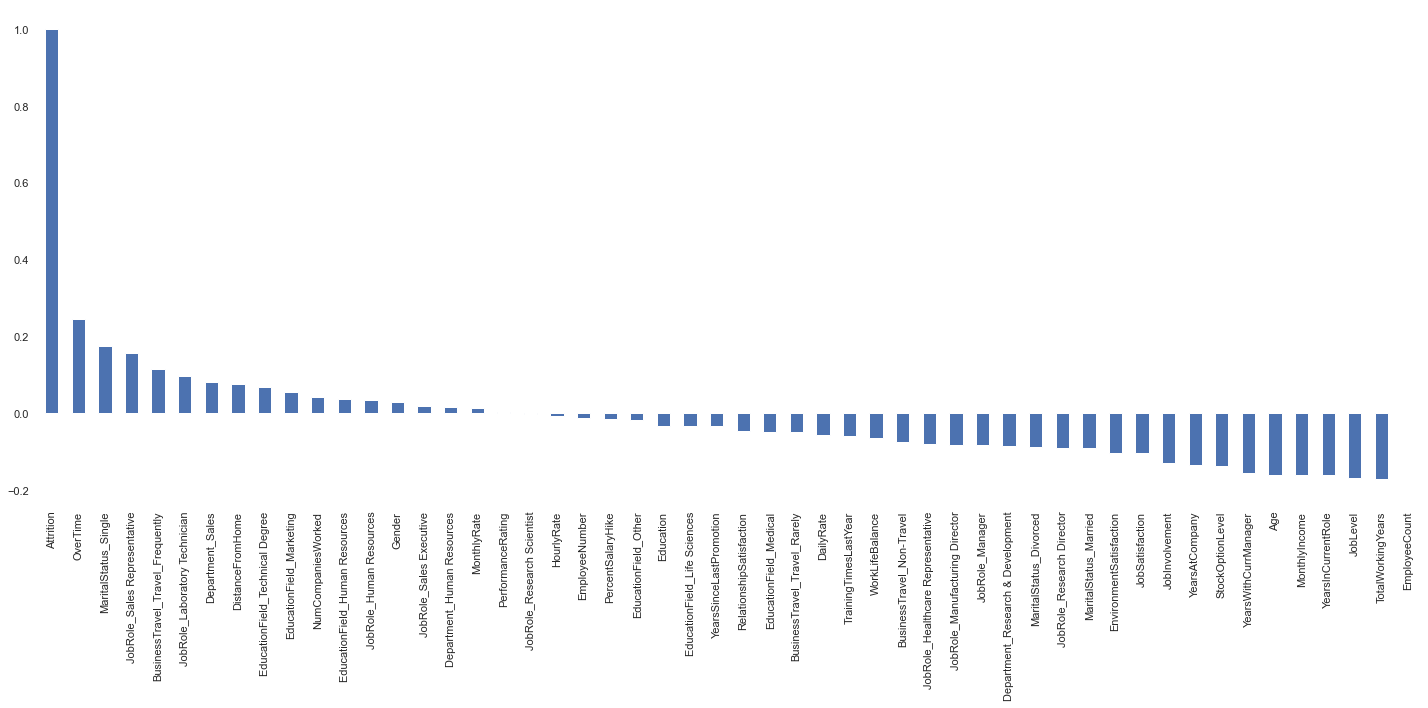

In [54]:
sns.set(rc={"axes.facecolor":"white","figure.facecolor":"white"})
plt.figure(figsize=(20,10))
correlations['Attrition'].sort_values(ascending = False).plot(kind='bar');

Dễ nhận thấy ngay là 'EmployeeCount' hoàn toàn không có quan hệ với 'Attrition'.

In [55]:
df_copy.drop(['EmployeeCount'],axis=1,inplace=True)

In [56]:
correlations.drop(['EmployeeCount'],axis=1,inplace=True)

In [57]:
correlations.drop(['EmployeeCount'],axis=0,inplace=True)

**Cách 3:**
- Sử dụng correlations giữa các biến độc lập với nhau:
  + Hai biến độc lập khi có giá trị correlation càng cao thì chứng tỏ chúng càng mang thông tin giống nhau cho ngữ cảnh của bài toán.
  + Do đó khi hai biến độc lập có correlation cao thì có thể chọn một trong hai để áp dụng vào việc huấn luyện mô hình.

In [58]:
threshold=0.7
cols=list(correlations.columns)
cols_at_index=list(correlations.index)
feature1, feature2, correlation=[], [], []
for i in range(len(cols)):
    for j in range(len(correlations)):
        if correlations[cols[i]][j]>=threshold and correlations[cols[i]][j]<1 and cols_at_index[j] not in feature1:
            feature1.append(cols[i])
            feature2.append(cols_at_index[j])
            correlation.append(correlations[cols[i]][j])
new_df=pd.DataFrame({'feature1':[feature1[i] for i in range(len(feature1))],
                     'feature2':[feature2[i] for i in range(len(feature2))],
                     'correlation':[correlation[i] for i in range(len(correlation))],})
new_df

feature1                 feature2  correlation
0                    JobLevel            MonthlyIncome     0.950300
1                    JobLevel        TotalWorkingYears     0.782208
2               MonthlyIncome        TotalWorkingYears     0.772893
3           PercentSalaryHike        PerformanceRating     0.773550
4              YearsAtCompany       YearsInCurrentRole     0.758754
5              YearsAtCompany     YearsWithCurrManager     0.769212
6          YearsInCurrentRole     YearsWithCurrManager     0.714365
7  Department_Human Resources  JobRole_Human Resources     0.904983
8            Department_Sales  JobRole_Sales Executive     0.808869

- **TotalWorkingYears, JobLevel và MonthlyIncome:** Có giá trị correlation rất cao. Chọn giữ lại MonthlyIncome.
- **PercentSalaryHike và PerformanceRating:** Có giá trị correlation là 0.77. Chọn giữ lại  PerformanceRating.
- **YearsAtCompany, YearsInCurrentRole, và YearsWithCurrManager:** Có giá trị correlation cao. Chọn giữ lại YearsAtCompany.
- **Department_Human Resources và JobRole_Human Resources:** Có giá trị correlation là 0.9. Chọn giữ lại JobRole_Human Resources.
- **Department_Sales và JobRole_Sales Executive:** Có giá trị correlation là 0.8. Chọn giữ lại JobRole_Sales Executive.

In [59]:
df_copy.drop(['TotalWorkingYears', 'JobLevel', 'PercentSalaryHike', 'YearsInCurrentRole',
         'YearsWithCurrManager', 'Department_Human Resources', 'Department_Sales'],axis=1,inplace=True)

In [60]:
df_copy.head()

Age  Attrition  DailyRate  DistanceFromHome  Education  EmployeeNumber  \
0   41          1       1102                 1          2               1   
1   49          0        279                 8          1               2   
2   37          1       1373                 2          2               4   
3   33          0       1392                 3          4               5   
4   27          0        591                 2          1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  ...  \
0                        2       0          94               3  ...   
1                        3       1          61               2  ...   
2                        4       1          92               2  ...   
3                        4       0          56               3  ...   
4                        1       1          40               3  ...   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                              0                0   
1                              0                0   
2                              1                0   
3                              0                0   
4                              1                0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                           0                        1   
1                           1                        0   
2                           0                        0   
3                           1                        0   
4                           0                        0   

   JobRole_Sales Representative  MaritalStatus_Divorced  \
0                             0                       0   
1                             0                       0   
2                             0                       0   
3                             0                       0   
4                             0                       0   

   MaritalStatus_Married  MaritalStatus_Single  
0                      0                     1  
1                      1                     0  
2                      0                     1  
3                      1                     0  
4                      1                     0  

[5 rows x 44 columns]

<a id="4.2.3"></a>
<h2 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>3. Xử lý các giá trị thiếu</b></h2>

Thống kê số lượng giá trị thiếu của mỗi cột

In [61]:
df_copy.isnull().sum()

Age                                  0
Attrition                            0
DailyRate                            0
DistanceFromHome                     0
Education                            0
EmployeeNumber                       0
EnvironmentSatisfaction              0
Gender                               0
HourlyRate                           0
JobInvolvement                       0
JobSatisfaction                      0
MonthlyIncome                        0
MonthlyRate                          0
NumCompaniesWorked                   0
OverTime                             0
PerformanceRating                    0
RelationshipSatisfaction             0
StockOptionLevel                     0
TrainingTimesLastYear                0
WorkLifeBalance                      0
YearsAtCompany                       0
YearsSinceLastPromotion              0
BusinessTravel_Non-Travel            0
BusinessTravel_Travel_Frequently     0
BusinessTravel_Travel_Rarely         0
Department_Research & Dev

Bộ dữ liệu không tồn tại bất kì giá trị thiếu nào trong tất cả các cột thuộc tính. Vậy có thể bỏ qua bước này.

<a id="4.2.3"></a>
<h2 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>4. Feature Scaling</b></h2>

- Khi khoảng giá trị giữa 2 thuộc tính quá cách xa nhau thì việc mô hình hóa cũng như trực quan mối quan hệ có thể gặp khó khăn, do đó phải thực hiện kĩ thuật 'Feature Scaling' hay việt hóa là 'Co giãn thuộc tính'.
- Có 3 phương pháp feature scaling chính là:
  + Standardisation (Chính quy hóa): Làm cho tập dữ liệu có trung bình là 0 và độ lệch chuẩn là 1 và được áp dụng cho hầu hết các trường hợp cần feature scaling.
  + Normalisation (Tiêu chuẩn hóa): Làm cho các giá trị trong tập dữ liệu thuộc đoạn [0, 1] và được áp dụng nếu tập dữ liệu tuân theo phân phối chuẩn.
  + MinMax Scaler: Đưa các giá trị về khoảng giữa 2 giá trị min và max trong miền giá trị của thuộc tính, có thể là đoạn [-1, 0], [0, 1], [-1, 1],...
- Trong bài này nhóm chọn phương pháp Standardisation để scaling khoảng giá trị của thuộc tính về khoảng gần hơn với giá trị của tập y.
- **Nhóm sẽ không cài đặt ở bước này mà sẽ tích hợp việc feature scaling vào Pipeline của thư viện sklearn trong bước xây dựng mô hình về sau.**

<center> <a href="#top" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4.3"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color:#254E58; background-color: #ffffff;"><b>III. Xây dựng mô hình học máy </b> </h2>

<a id="4.3.1"></a>
<h2 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>1. Logistic Regression cho Phân loại nhị phân</b></h2>

**Mô tả bài toán:**
- Mục tiêu của bài toán phân loại nhị phân là dự đoán xác suất thuộc về một trong hai lớp cần phân lớp của một biến phụ thuộc dựa vào các biến độc lập(hay còn gọi là thuộc tính).
- Trong bộ dữ liệu này chúng ta sẽ thử dự đoán **xác suất thuộc về lớp 0 hoặc 1 của biến Attrition dựa vào các thuộc tính độc lập khác của một người nhân viên.**

**Cost Function:**
- Bắt đầu với việc xây dựng một hypothesis tương tự như bài toán linear regression: $h_{\theta}$(x): $\theta_{0}$ + $\theta_{1}$x với $\theta_{i}$ (i=0,1) là các tham số (parameters) của công thức hồi quy và $\theta_{0}$ còn đươc gọi là hệ số tự do.
- Tuy nhiên sử dụng đường thẳng tuyến tính là không phù hợp cho mục tiêu của bài toán khi giá trị dự đoán cần thuộc vào một trong hai lớp là 0 hoặc 1, nhưng với một đường thẳng tuyến tính thì $h_{\theta}$(x) có thể lớn hơn 1 và nhỏ hơn 0.
- Lúc này cần 1 giải pháp để giá trị dự đoán có thể nằm trong khoảng 0 đến 1 => truyền hypothesis qua một hàm sigmoid mà giá trị trả về của một hàm sigmoid nằm trong khoảng 0 đến 1.
Đặt z=$h_{\theta}(x)$
$$sigmoid(z)=-\frac{1}{1+e^{-z}}\$$

(Hình ảnh minh họa cho hàm sigmoid sẽ được trình bày kĩ trong file báo cáo của nhóm).

- Lúc này, ta có giá trị dự đoán y_hat=sigmoid(z) nằm trong khoảng từ 0 đến 1 hay nói cách khác đây chính là giá trị xác suất mà y_hat thuộc về một trong hai lớp với điều kiện cho trước là các thuộc tính đầu vào khác.
- Thông thường, quy ước giá trị trả về của hàm sigmoid biểu thị cho xác suất thuộc lớp 1 của y_hat: y_hat=sigmoid(z)=P(y=1|x) => P(y=0|x) = 1 - y_hat = 1 - P(y=1|x).
- Vậy làm thế nào có thể quy định lớp mà y_hat thuộc về?
  + Chúng ta sẽ sử dụng một giá trị ngưỡng mà nếu y_hat lớn hơn hoặc bằng ngưỡng này sẽ thuộc về lớp 1, ngược lại thuộc về lớp 0.
  + Ngưỡng giá trị thông thường sẽ là 0.5, điều này tương ứng với việc nếu z>=0 thì y_hat thuộc về lớp 1 (do sigmoid(z>=0)>=0.5).
- Sau khi có được tập các giá trị dự đoán của các mẫu đầu vào, để đánh giá xem hypothesis đã tốt hay chưa chúng ta xây dựng một hàm chi phí để tính toán độ sai lệch giữa giá trị dự đoán và giá trị thực tế.

$$J(\theta)= -\frac{1}{N}\sum_{i=1}^{N}(y_{i}\log(\hat{y}_{i}) + (1 - y{i})\log(1 - \hat{y}_{i}))$$

với $\hat{y}_{i}$=${y\_hat}_{i}$
- Do càng nhiều giá trị dự đoán giống với giá trị thực tế càng tốt nên $J(\theta)$ có giá trị càng bé càng tốt.

**Gradient Descent:**
- Với mục tiêu là cực tiểu hóa hàm chi phí $$J(\theta)= -\frac{1}{N}\sum_{i=1}^{N}(y_{i}\log(\hat{y}_{i}) + (1 - y{i})\log(1 - \hat{y}_{i}))$$
- Thì các tham số $\theta$ sẽ là những giá trị mà chúng ta cần phải thay đổi để tối ưu hóa Cost Function, và một trong những cách để thực hiện việc này là thuật toán Gradient Descent.
- Thuật toán được thực hiện như sau:
**Trong mỗi lần lặp cập nhật một cách đồng thời các tham số ${\theta}_{j}$ theo công thức như sau:** $$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)}$$

Trong đó: alpha là 'learning rate' giúp việc học được tối ưu hơn.

<a id="4.3.2"></a>
<h2 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>2. Sử dụng Pipeline và Các độ đo được dùng để đánh giá mô hình</b></h2>

**Pipeline:**
- Pipeline là một công cụ giúp kết hợp nhiều bước xử lý dữ liệu và huấn luyện mô hình thành một quy trình hoàn chỉnh.
- Các bước để thực hiện xây dựng một mô hình học máy sẽ được xếp tuần tự trong một đối tượng Pipeline (có thể xem như một đường ống để dẫn lần lươt đi qua các bước).
- Pipeline giúp tiết kiệm thời gian và tối ưu hóa quá trình huấn luyện mô hình.

**Các độ đo:**
- Các độ đo được nhóm sử dụng trong bài này sẽ là:
  + Accuracy score.
  + Precision.
  + Recall.
  + F1-score.

**(Hình ảnh về pipeline và định nghĩa các độ đo được nhóm trình bày trong file báo cáo đính kèm).**

<a id="4.3.3"></a>
<h2 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>3. Cài đặt</b></h2>

***Lý do cụ thể cho các bước thực hiện dưới đây sẽ được nhóm giải thích một cách chi tiết trong file báo cáo đi kèm.***

**Tạo tập các thuộc tính đầu vào và tập các biến mục tiêu từ bộ dữ liệu ban đầu.**

In [62]:
X=np.array(df_copy.drop(['Attrition'],axis=1))
y=np.array(df_copy['Attrition'])

In [63]:
X

array([[  41, 1102,    1, ...,    0,    0,    1],
       [  49,  279,    8, ...,    0,    1,    0],
       [  37, 1373,    2, ...,    0,    0,    1],
       ...,
       [  27,  155,    4, ...,    0,    1,    0],
       [  49, 1023,    2, ...,    0,    1,    0],
       [  34,  628,    8, ...,    0,    1,    0]], dtype=int64)

In [64]:
y

array([1, 0, 1, ..., 0, 0, 0])

**Chia tập dự liệu thành tập huấn luyện và tập kiểm tra:**

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [66]:
print(X_train.shape)
print(X_test.shape)

(1176, 43)
(294, 43)


**Cài đăt mô hình:**

In [67]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver="liblinear",penalty="l2",
                                      class_weight={0:1,1:1},max_iter=10000))
])

pipe.fit(X_train, y_train)
pipe.named_steps['classifier'].get_params()

{'C': 1.0,
 'class_weight': {0: 1, 1: 1},
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

**Giải thích Pipeline:** Xây dựng một pipeline thực hiện các bước sau:
- Đầu tiên tạo một thành phần 'scaler' thực hiện việc chuẩn hóa dữ liệu như đã đề cập ở mục cuối của phần tiền xử lý dữ liệu. Thành phần này sử dụng lớp StandardScaler() được cung cấp bởi sklearn để thực hiện chuẩn hóa giá trị của từng cột trong X theo phương pháp Standardisation (Chính quy hóa).
- Tiếp theo là tạo một bộ phân lớp 'classifier' để thực hiện việc phân loại các mẫu đầu vào về một trong hai lớp của bài toán phân loại nhị phân. Bộ phân lớp này áp dụng thuật toán Logistic Regression mà nhóm đã giới thiệu trước đó (Các tham số trong lớp LogisticRegression sẽ được giải thích trong file báo cáo đi kèm).

In [68]:
#dự đoán
predictions=pipe.predict(X_test)
predictions

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0])

**Đánh giá mô hình:** Trước tiên xem xét giá trị của accuracy score.

In [69]:
acc_score=accuracy_score(predictions, y_test)
print(acc_score)

0.8775510204081632


Accuracy Score đạt khá cao nhưng liệu đã đủ tốt cho việc đánh giá mức độ hiệu quả của mô hình?

Hãy cùng xem xét thêm về các độ đo khác.

In [70]:
report=classification_report(predictions, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       267
           1       0.41      0.74      0.53        27

    accuracy                           0.88       294
   macro avg       0.69      0.82      0.73       294
weighted avg       0.92      0.88      0.89       294



Đúng là đừng nên vội tin những điều màu hồng trước mắt 😃

- Các độ đo khác như Precision, Recall và F1-score đều rất thấp ở lớp 1 hơn so với ở lớp 0, chứng tỏ mô hình dự đoán chưa tốt cho các trường dự đoán mẫu thuộc thực tế thuộc về lớp 1 (hay nói trong ngữ cảnh này là các mẫu thuộc về lớp tiêu cực).
- Và điều này làm chúng ta có thể nghĩ đến trường hợp mất cân bằng dữ liệu (imbalanced data).

**Kiểm tra tính cân bàng của dữ liệu:**

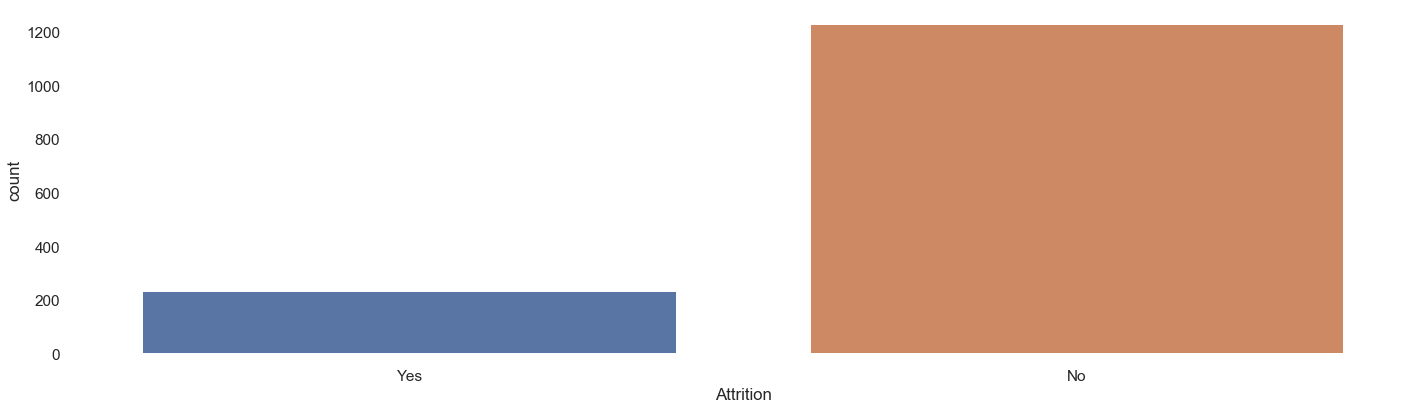

In [71]:
sns.set(rc={"axes.facecolor":"white","figure.facecolor":"white"})
sns.set_context("poster",font_scale = .7)
plt.subplots(figsize=(20,6))
sns.countplot(data=df,x=df['Attrition']);

- Rõ ràng xảy ra hiện tượng mất cân bằng giữa hai lớp 0 và 1 khi số lượng các phần tử thuộc lớp 0 trong bộ dữ liệu này nhiều xấp xỉ gấp 6 lần số lượng các phần tử thuộc lớp 1.
- Sự mất cân bằng nghiêm trọng này ảnh hưởng rất lớn đến khả năng dự đoán chính xác của mô hình.

**Mất cân bằng dữ liệu và cách giải quyết:**

- Dữ liệu bị mất cân bằng hiểu sự phân bổ các mẫu trên các lớp chêch lệch nhau quá lớn dẫn tới việc mô hình chỉ tập trung học những đặc trưng của lớp có số lượng mẫu là chiếm đa số. Làm cho việc dự đoán của mô hình xảy ra tình trạng thiên vị, mất đi tính tổng quát cho dữ liệu thực tế sau này.
- Có nhiều cách xử lý việc mất căn bằng dữ liệu như: Thu thập thêm dữ liệu, các thuật toán tăng mẫu dữ liệu (Oversampling), các thuật toán giảm mẫu dữ liệu (Undersampling), sử dụng trọng số để phạt mô hình cho các giá trị dự đoán của các lớp,....
- Trong phần này nhóm sẽ thực hiện hai phương pháp:
  + Sử dụng **trọng số** để phạt mô hình.
  + Ứng dụng **Thuật toán SMOTE** thuộc nhóm Oversampling.
  
***(Chi tiết về mặt lý thuyết của mất cân bằng dữ liệu, tác hại của mất cân bằng dữ liệu, phương pháp sử dụng trọng số, phương pháp sử dụng thuật toán SMOTE sẽ được nhóm trình bày trong file báo cáo đính kèm).***

**Sử dụng trọng số để tăng việc phạt mô hình nếu dự đoán sai lớp:**

In [72]:
pipe2 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver="liblinear",penalty="l2",
                                      class_weight={0:1,1:2},max_iter=10000))
])

pipe2.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(class_weight={0: 1, 1: 2}, max_iter=10000,
                                    solver='liblinear'))])

In [73]:
predictions2=pipe2.predict(X_test)

In [74]:
acc_score2=accuracy_score(predictions2, y_test)
print(acc_score2)

0.8741496598639455


In [75]:
report2=classification_report(predictions2, y_test)
print(report2)

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       246
           1       0.61      0.62      0.62        48

    accuracy                           0.87       294
   macro avg       0.77      0.77      0.77       294
weighted avg       0.88      0.87      0.87       294



- Với việc sử dụng một trọng số lớn hơn cho lớp 1 đã giúp cải thiện precision và f1-score của lớp 1 một cách đáng kể, cho thấy tính tổng quá của mô hình đã được tăng lên.
- Tuy nhiên các độ đo này vẫn chưa đạt được đến giá trị thật sự tốt lắm cho một bài toán phân loại.
- Và nhóm cũng đã thực nghiệm với nhiều cặp trọng số khác nhau nhưng kết quả thu được tốt nhất và là {0:1, 1:2}.

**Áp dụng thuật toán SMOTE:**

In [76]:
from imblearn.over_sampling import SMOTE
X,y=SMOTE(sampling_strategy=1, random_state=0).fit_resample(X, y)

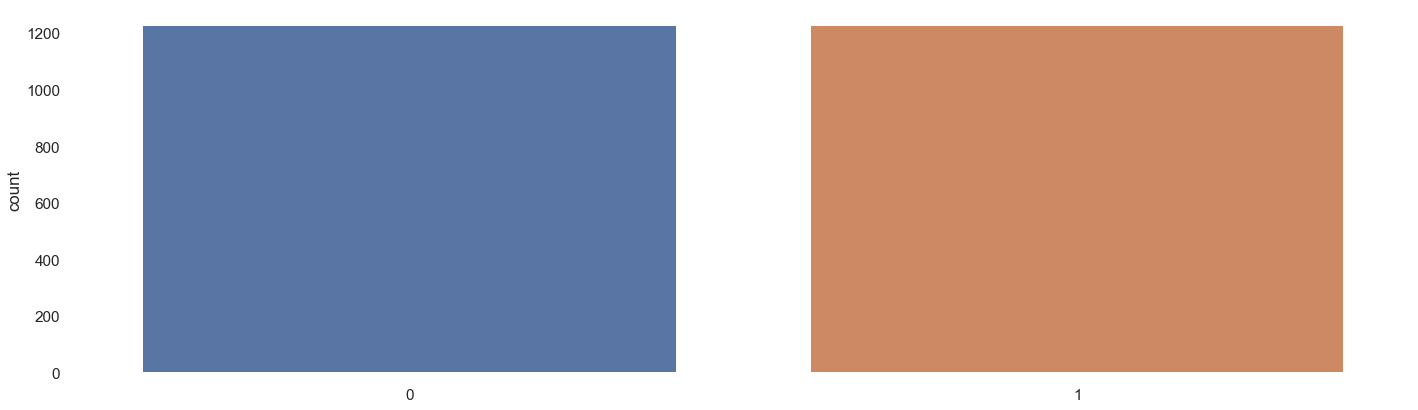

In [77]:
sns.set(rc={"axes.facecolor":"white","figure.facecolor":"white"})
sns.set_context("poster",font_scale = .7)
plt.subplots(figsize=(20,6))
sns.countplot(x=y);

**Chia tập dự liệu thành tập huấn luyện và tập kiểm tra:**

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [79]:
print(X_train.shape)
print(X_test.shape)

(1972, 43)
(494, 43)


**Cài đặt mô hình:**

In [80]:
pipe3 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver="liblinear",penalty="l2",
                                      class_weight={0:1,1:1},max_iter=10000))
])

pipe3.fit(X_train, y_train)
pipe3.named_steps['classifier'].get_params()

{'C': 1.0,
 'class_weight': {0: 1, 1: 1},
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [81]:
#dự đoán
predictions3=pipe3.predict(X_test)
predictions3

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,

**Đánh giá mô hình:**

In [82]:
#Trước tiên xem xét accuracy score của mô hình
acc_score3=accuracy_score(predictions3, y_test)
print(acc_score3)

0.9048582995951417


In [83]:
#Xem xét chi tiết hơn đến các giá trị metric khác như F1-score hay Recall score
report3=classification_report(predictions3, y_test)
print(report3)

              precision    recall  f1-score   support

           0       0.98      0.84      0.91       268
           1       0.84      0.98      0.90       226

    accuracy                           0.90       494
   macro avg       0.91      0.91      0.90       494
weighted avg       0.92      0.90      0.90       494



- Tất cả các độ đo đều đạt ở mức 90% hoặc hơn, cho thấy sự hiệu quả của thuật toán SMOTE trên bộ dữ liệu này.

<center> <a href="#top" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4.4"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color:#254E58; background-color: #ffffff;"><b>V. Tổng kết </b> </h2>

<div style="border-radius:10px;border:#0C6A86 solid;padding: 15px;background-color:#ebfae8;font-size:110%;text-align:left">
    
- Nhóm sẽ không đi sâu vào việc rút ra ý nghĩa nào từ bộ dữ liệu thông qua việc xây dựng mô hình học máy. Điều này được thực hiện ở một giai đoạn khác chính là EDA bộ dữ liệu.
- Thông qua mô hình học máy nhóm chú trọng vào các khía cạnh:
  + Tiền xử lý dữ liệu.
  + Rút trích đặc trưng.
  + Xây dựng mô hình học máy hiệu quả.
  
- Nhóm đã phát hiện vấn đề về mất cân bằng dữ liệu xảy ra trên bộ dữ liệu này, một điều gây nhiều khó khăn cho quá trình xây dựng các bộ phân lớp.
- Thực hiện các phương pháp để giải quyết vấn đề mất cân bằng dữ liệu và xây dựng mô hình học máy để sử dụng như bộ phân lớp với các độ đo đạt kết quả rất khả quan:
  + Accuracy score: 90%.
  + Precision macro average: 91%.
  + Recall macro average: 91%.
  + F1-Score macro average: 90%.

# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>HẾT</b></div>

<center> <img src="https://raw.githubusercontent.com/ntclai/PictureForMyProject/main/87481-of-thanks-letter-text-logo-calligraphy-drawing%20(1).png" style='width: 600px; height: 300px;'>

<center> <a href="#top" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>